# Clustering with <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>

---

The objective of this tutorial is to apply the different concepts studied during the course on clustering to identify groups of wines.

---

## Data exploration

In this tutoral we will studied the _wine_ dataset (_wine.txt_).
This dataset includes physico-chemical measurements performed on a sample of $n=600$ wines (red and white) from Portugal. These measurements are complemented by a sensory evaluation of the quality by a set of experts. Each wine is described by the following variables:
- _Quality:_ Wine quality according to experts (“bad“, “medium”, “good”),
- _Type:_ 1 for red wine and 0 for white wine,
- _AcidVol:_ The volatile acid content (in g/dm3 of acetic acid),
- _AcidCitr:_ The citric acid content (in g/dm3),
- _SO2lbr:_ The measurement of free sulfur dioxide (in mg/dm3),
- _SO2tot:_ Total sulfur dioxide measurement (in mg/dm3),
- _Density:_ The density (in g/cm3),
- _Alcohol:_ The alcohol level (in % of Vol.).

### Some important parkages

In [9]:
install.packages('factoextra')

Installation du package dans ‘/home/mbui/R/libs’
(car ‘lib’ n'est pas spécifié)

installation des dépendances ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘rstatix’, ‘dendextend’, ‘ggpubr’




In [2]:
library(ggplot2)
library(reshape)
library(gridExtra)

##### <span style="color:purple">**Todo:** Load the _wine.txt_ dataset and: </span>

- Use the `str()` function to show information about variables. Are all variables on the appropriated type?
- If not transform quantitative variables to factors with the `as.factor` function.
- Rename the levels of the variable _type_ : 1=red and 0=white.

In [3]:
### TO BE COMPLETED ### 

wine = read.table("wine.txt")
head(wine)

# --- #

wine$Quality = as.factor(wine$Quality)                   #conversion to factor
wine$Type = factor(wine$Type, labels=c("white", "red"))  #rename levels of type

head(wine)

,Quality,Type,AcidVol,AcidCitr,SO2lbr,SO2tot,Density,Alcohol
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1352,medium,1,0.62,0.01,8,46,0.99332,11.8
5493,medium,0,0.34,0.10,17,63,0.99370,9.2
5153,medium,0,0.22,0.22,39,110,0.99855,9.0
5308,medium,0,0.35,0.46,61,183,0.99786,9.0
3866,medium,0,0.42,0.32,20,167,0.99479,10.6
694,medium,1,0.48,0.32,21,122,0.99840,9.4


,Quality,Type,AcidVol,AcidCitr,SO2lbr,SO2tot,Density,Alcohol
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1352,medium,red,0.62,0.01,8,46,0.99332,11.8
5493,medium,white,0.34,0.10,17,63,0.99370,9.2
5153,medium,white,0.22,0.22,39,110,0.99855,9.0
5308,medium,white,0.35,0.46,61,183,0.99786,9.0
3866,medium,white,0.42,0.32,20,167,0.99479,10.6
694,medium,red,0.48,0.32,21,122,0.99840,9.4


In [ ]:
# solutions/data/load_data.r

### Exploratory data analysis

In [4]:
library(corrplot)

corrplot 0.92 loaded



In [5]:
summary(wine)

   Quality       Type        AcidVol          AcidCitr          SO2lbr      
 bad   : 19   white:425   Min.   :0.1000   Min.   :0.0000   Min.   :  2.00  
 good  :110   red  :175   1st Qu.:0.2400   1st Qu.:0.2400   1st Qu.: 15.75  
 medium:471               Median :0.3000   Median :0.3000   Median : 27.00  
                          Mean   :0.3512   Mean   :0.3141   Mean   : 29.41  
                          3rd Qu.:0.4300   3rd Qu.:0.3900   3rd Qu.: 41.00  
                          Max.   :1.0400   Max.   :1.0000   Max.   :112.00  
     SO2tot         Density          Alcohol     
 Min.   :  7.0   Min.   :0.9875   Min.   : 8.00  
 1st Qu.: 68.0   1st Qu.:0.9925   1st Qu.: 9.50  
 Median :114.5   Median :0.9949   Median :10.40  
 Mean   :111.2   Mean   :0.9947   Mean   :10.49  
 3rd Qu.:154.0   3rd Qu.:0.9970   3rd Qu.:11.30  
 Max.   :278.0   Max.   :1.0030   Max.   :14.00  

##### <span style="color:purple">**Todo:** Descriptive statistic and bivariate analysis: </span>
- Show description of variables with the `summary` function,
- Draw boxplots of quantitative variables. Analyze the results,
- Do graphical description of qualitative variables (barplot),
- Analyze correlation between numeric variables.

Using  as id variables

Using  as id variables

Using  as id variables



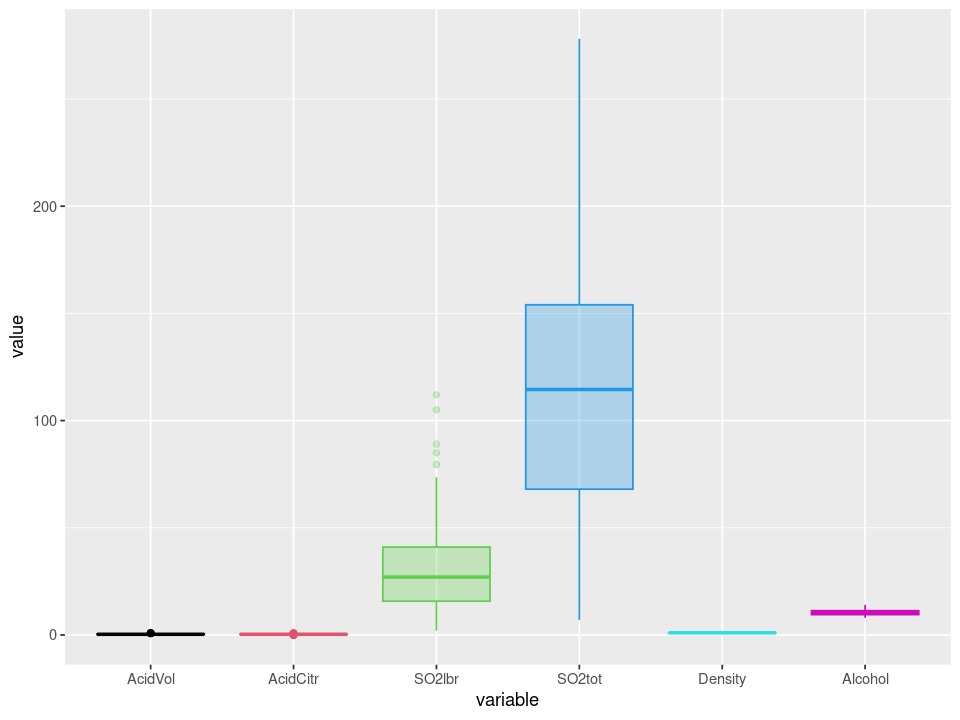

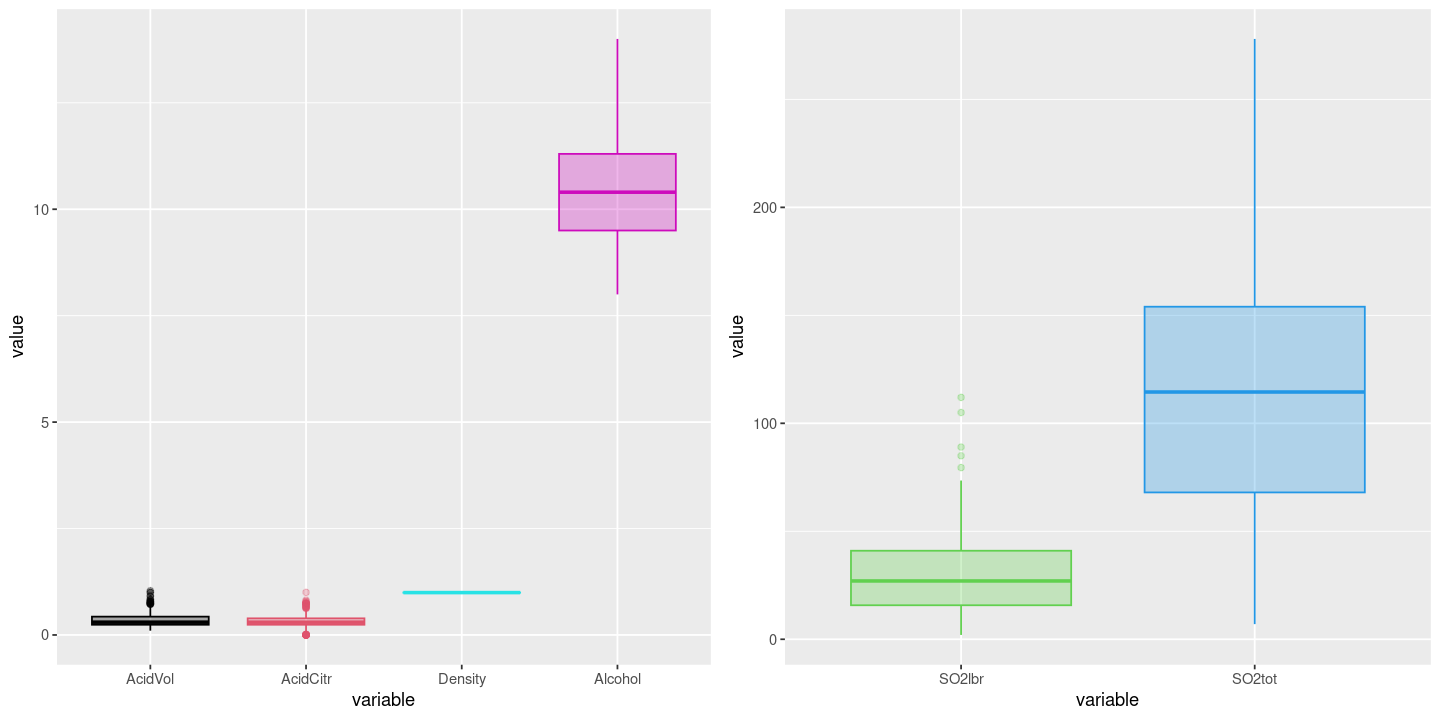

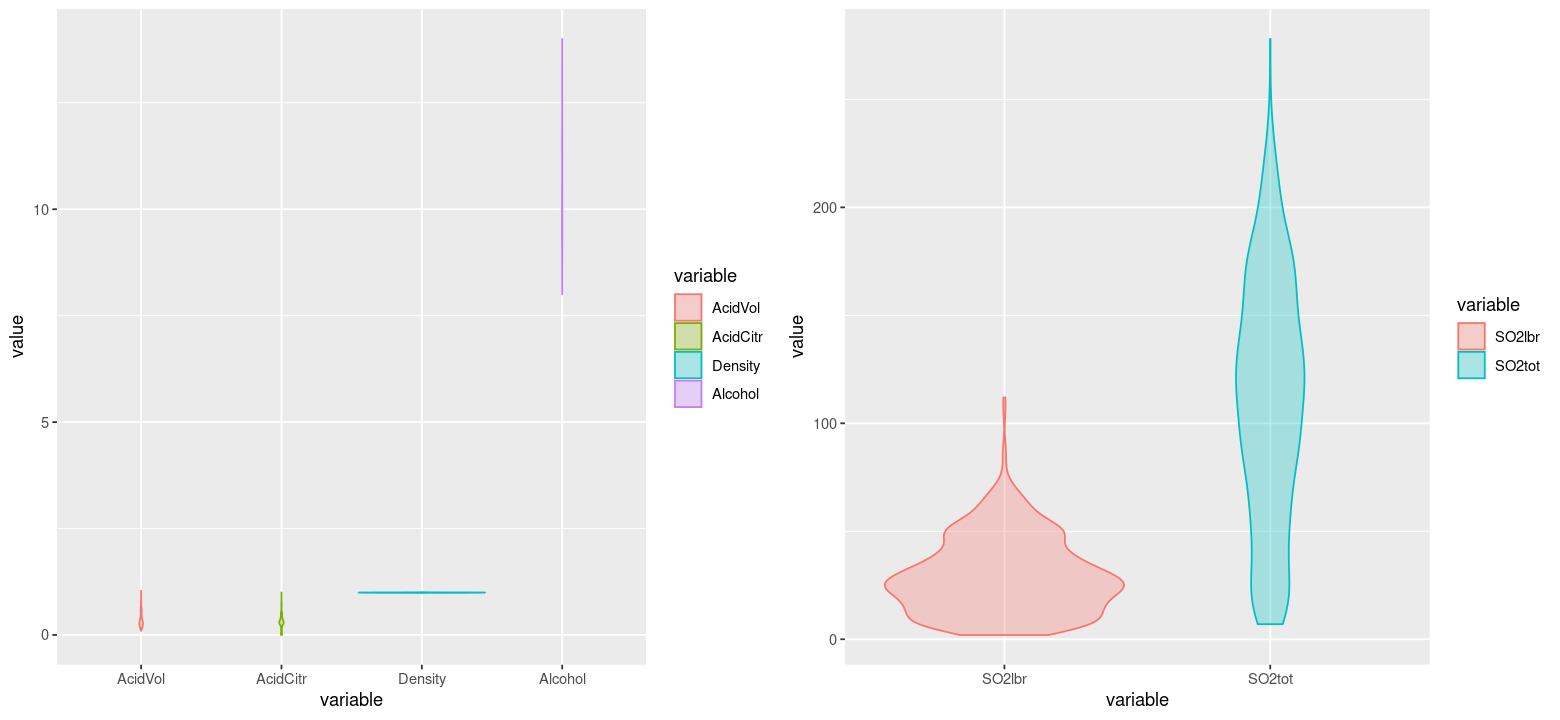

In [6]:
### TO BE COMPLETED ### 
# Descriptive statistics of quantitative data
# boxplot
options(repr.plot.width = 8, repr.plot.height = 6)

df = melt(wine[,-c(1,2)]) #gathering all numeric variable
ggplot(df, aes(x=variable, y=value)) + 
    geom_boxplot(color=c(1:6), fill=1:6, alpha=.3)

# --- #

# boxplot - zoom
options(repr.plot.width = 12, repr.plot.height = 6)

df1 = melt(wine[,c(3,4,7,8)])
p1 = ggplot(df1) + aes(x=variable, y=value) + 
    geom_boxplot(color=c(1,2,5,6), fill=c(1,2,5,6), alpha=.3)

df2 = melt(wine[,c(5,6)])
p2 = ggplot(df2) + aes(x=variable, y=value) +
    geom_boxplot(color=c(3,4), fill=c(3,4), alpha=.3)

grid.arrange(p1, p2, ncol=2)

# --- #

# violin plot
options(repr.plot.width = 13, repr.plot.height = 6)

p1 = ggplot(df1) + aes(x=variable, y=value, color=variable, fill=variable) + 
    geom_violin(alpha=.3)

p2 = ggplot(df2) + aes(x=variable, y=value, color=variable, fill=variable) + 
    geom_violin(alpha=.3)

grid.arrange(p1, p2, ncol=2)

In [ ]:
# solutions/data/quanti.r

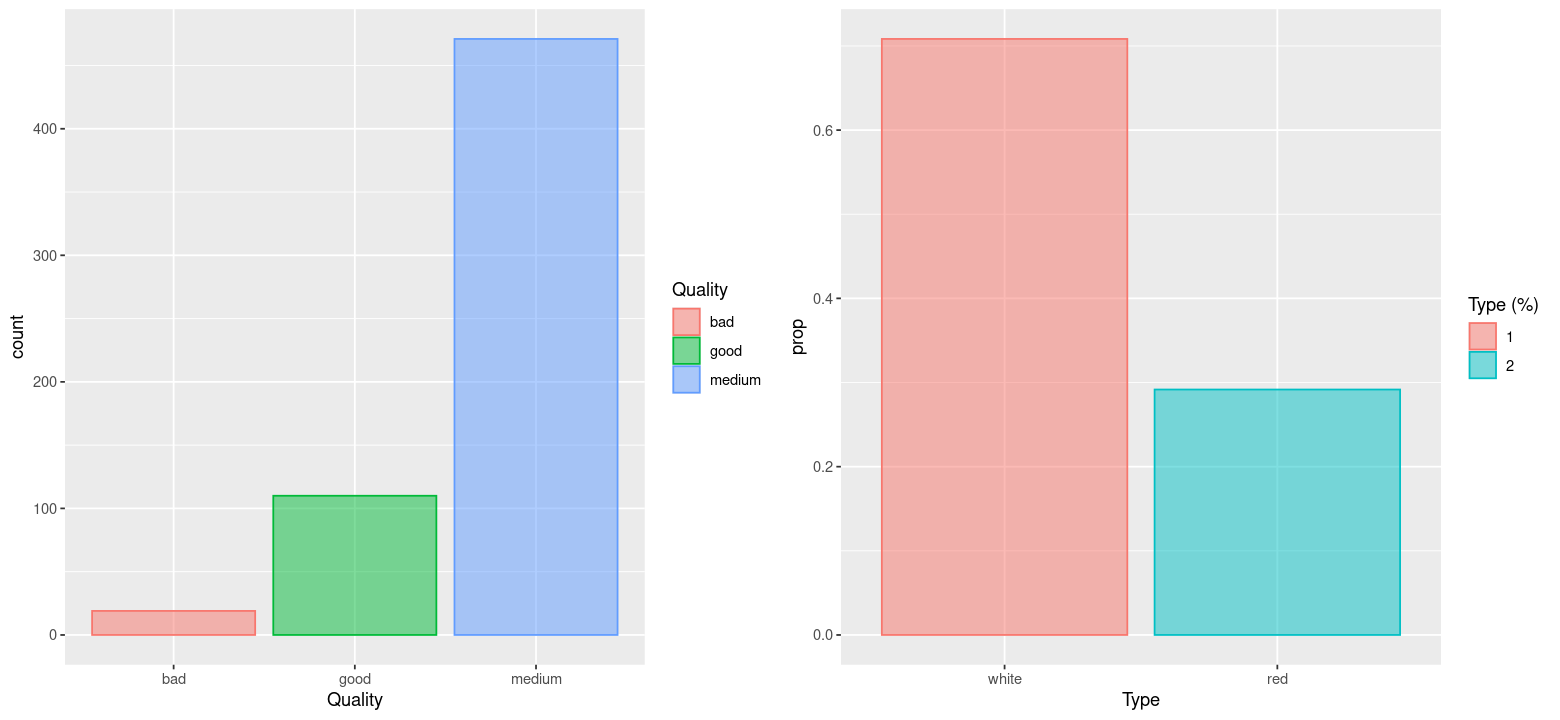

In [15]:
### TO BE COMPLETED ### 
# Descriptive statistics of qualitative data
p1 = ggplot(wine) +
    aes(x=Quality, color=Quality, fill=Quality) +
    geom_bar(alpha=.5)

p2 = ggplot(wine) +
    aes(x=Type, y=after_stat(prop), group=TRUE, fill=factor(after_stat(x)), color=factor(after_stat(x))) + 
    labs(fill="Type (%)", color="Type (%)") +
    geom_bar(alpha=.5)

grid.arrange(p1, p2, ncol=2)

In [ ]:
# solutions/data/quali.r

In [ ]:
### TO BE COMPLETED ### 
# Correlation study


In [ ]:
# solutions/data/correlation.r

### Principal Component Analysis

In [10]:
library(FactoMineR)
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [11]:
library(ggpubr)  #to get the ggarrange function

##### <span style="color:purple">**Todo:** PCA of wine dataset: </span>

- What impact can the above analyses have on the PCA result?
- Perform PCA of the _wine_ data (Quantitative variables should be specified as _supplementary_ variables) and make visualization of wines (ind.) on the first factorial plan (use _habillage_ parameter to show groups according to qualitative variables). 
- How many clusters groups of wines can be suggested?

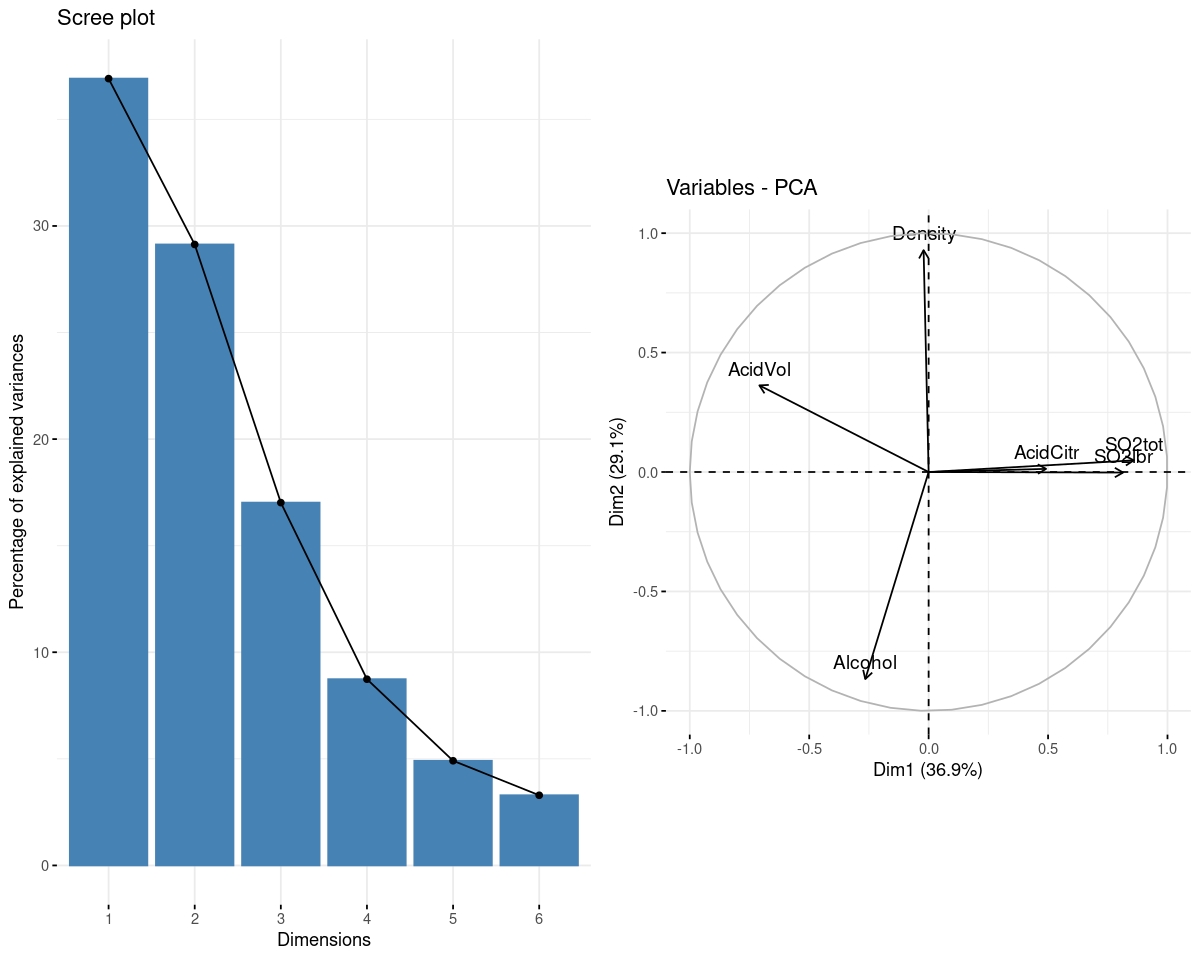

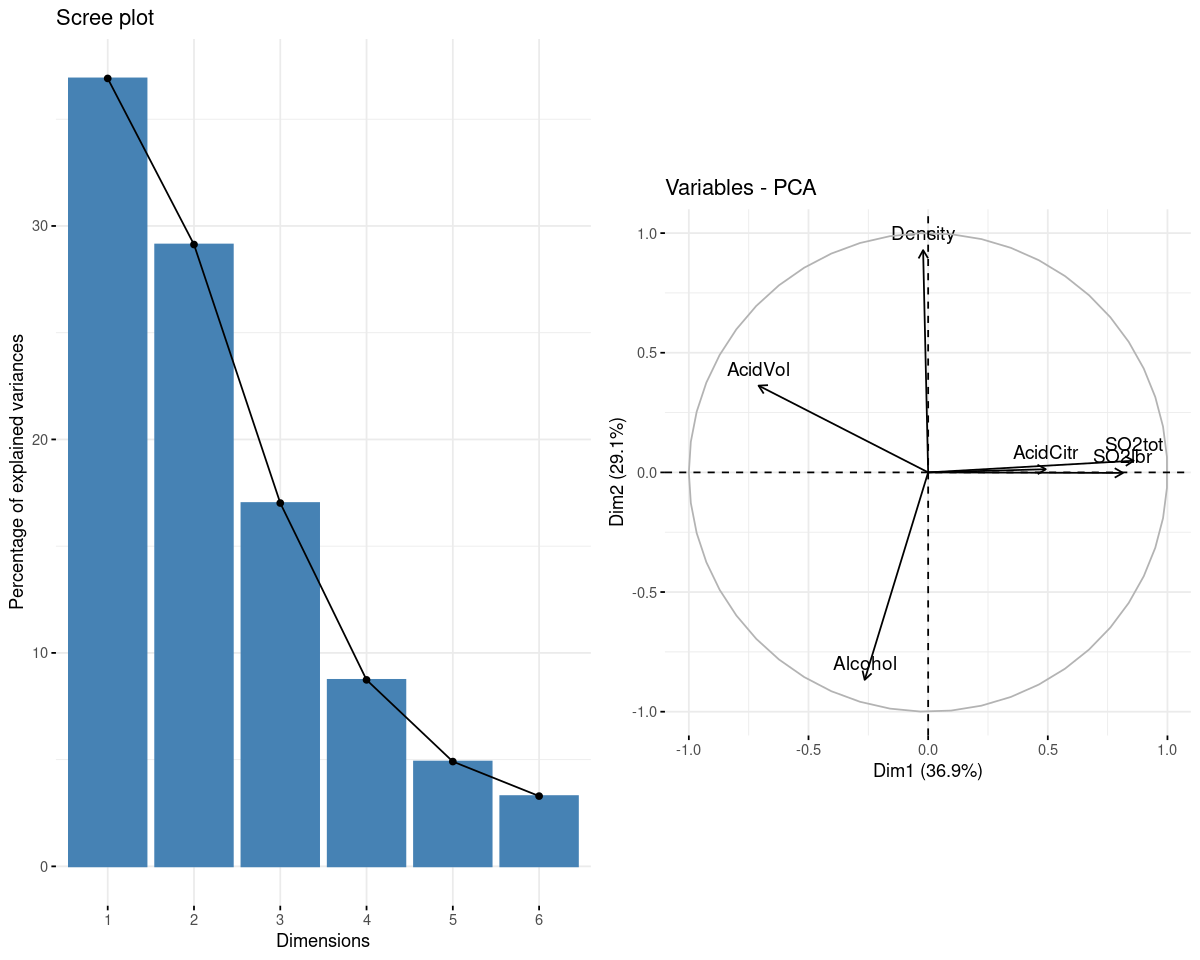

In [15]:
### TO BE COMPLETED ### 
# PCA of wine data -- Variables

options(repr.plot.width = 10, repr.plot.height = 8)

wine2 = wine
wine2[,-c(1,2)] = scale(wine[,-c(1,2)], scale=T, center=T) #sc
pca = PCA(wine2, quali.sup=c(1,2), scale.unit = TRUE, graph=FALSE)

# Visualisation of explained variance and variables
grid.arrange(
    fviz_eig(pca), 
    fviz_pca_var(pca,axes=c(1,2)),
    ncol=2
)

# -- #
# With ggarrange

ggarrange(
    fviz_eig(pca), 
    fviz_pca_var(pca,axes=c(1,2))
)

In [ ]:
# solutions/data/pca_var.r

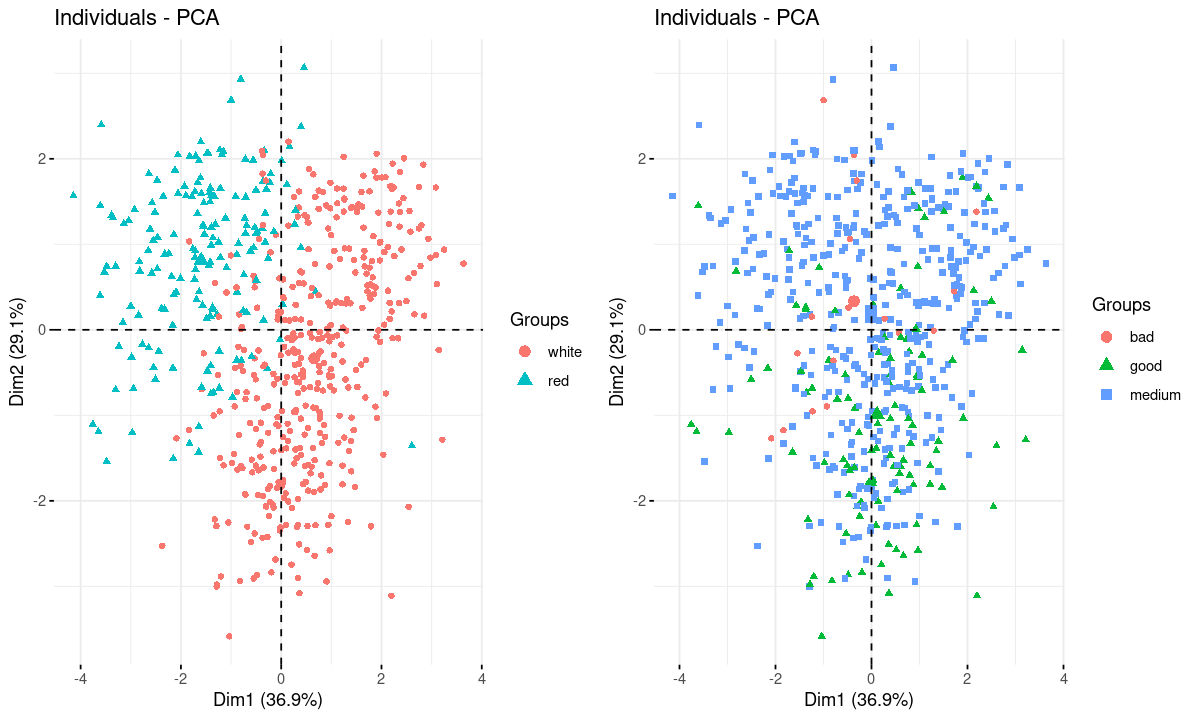

In [16]:
### TO BE COMPLETED ### 
# PCA of wine data -- Individuals
options(repr.plot.width = 10, repr.plot.height = 6)

grid.arrange(
    fviz_pca_ind(pca, axes=c(1,2), geom=c("point"), habillage=wine$Type),
    fviz_pca_ind(pca, axes=c(1,2), geom=c("point"), habillage=wine$Quality),
    ncol=2
)

In [ ]:
# solutions/data/pca_ind.r

## Clustering with $k$-means

In this part, we will perform the $k$-means clustering of wines by using only quantitative variable. Qualitative variable will be used to explains obtained clusters.

In [17]:
library(cluster)

##### <span style="color:purple">**Todo:** Clustering with $k=3$: </span>

- By using the [`kmeans`](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/kmeans) function, perform the clustering the wines. Numeric variables should be standardized before.
- Use the [`fviz_cluster`](https://search.r-project.org/CRAN/refmans/factoextra/html/fviz_cluster.html) function to visualize cluster on the first factorial plan of the PCA.
- Analyze the links between clusters and qualitative variables.

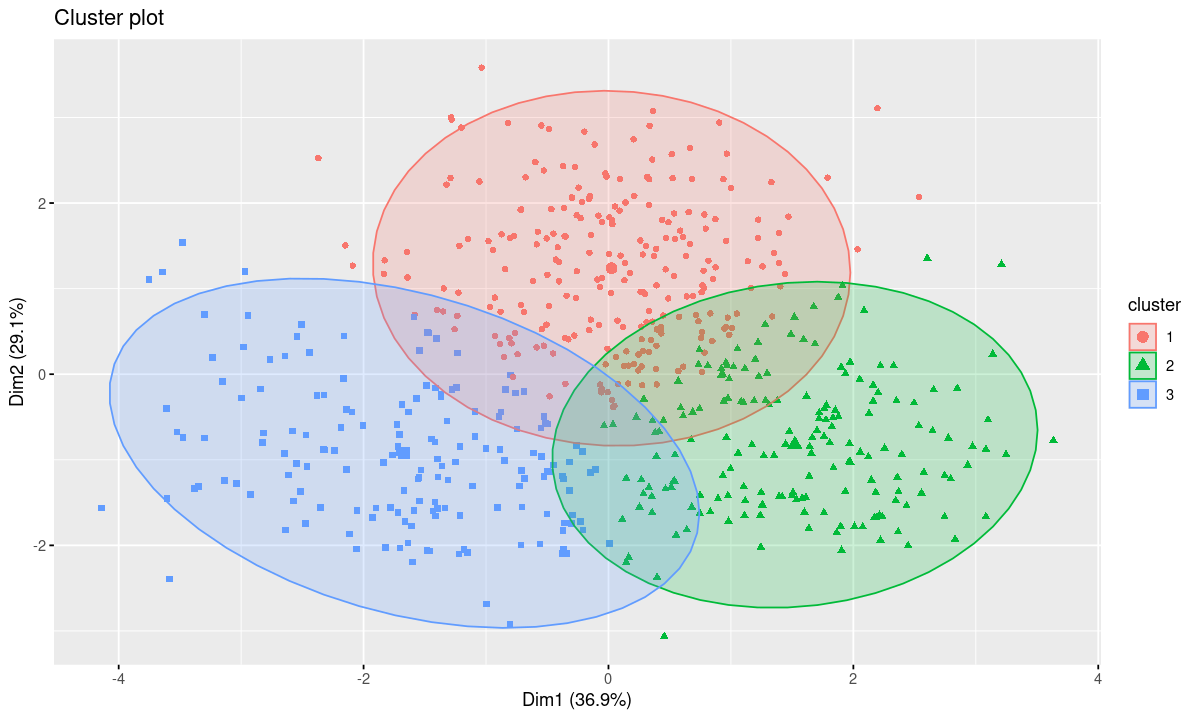

In [18]:
### TO BE COMPLETED ### 
# k-means, with k=3

reskmeans = kmeans(wine2[,-c(1,2)], centers=3) 

fviz_cluster(reskmeans, data=wine[,-c(1,2)], ellipse.type="norm", labelsize=8, geom=c("point"))

In [ ]:
# solutions/kmeans/kmeans.r

       
          1   2   3
  white 231 173  21
  red    17   9 149


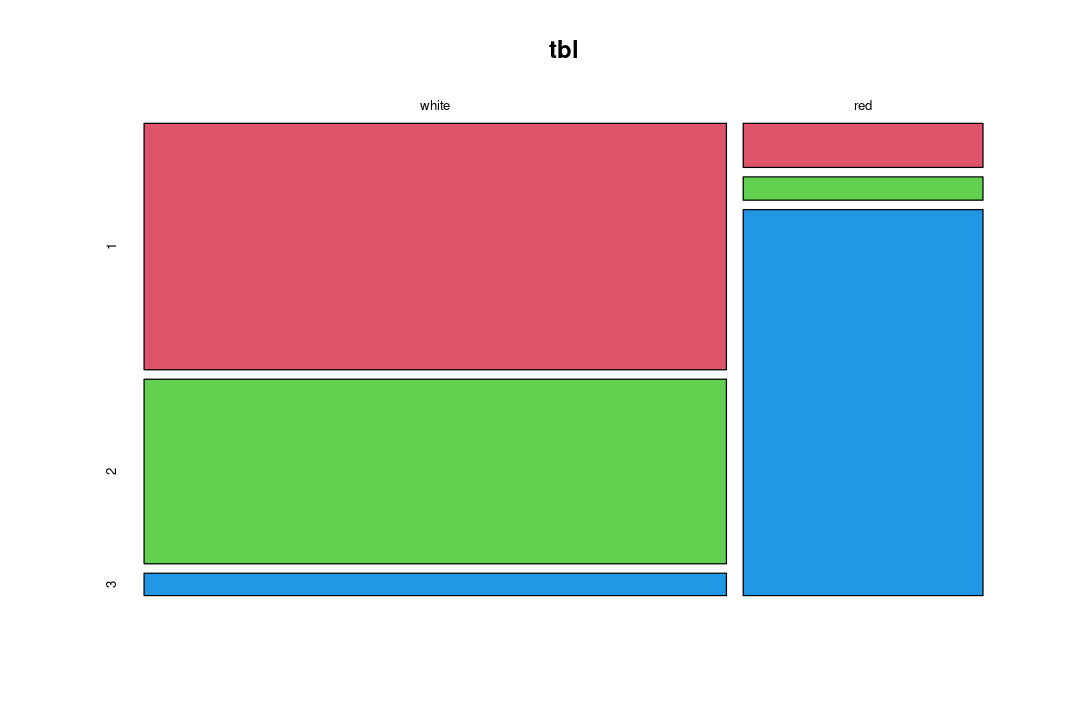

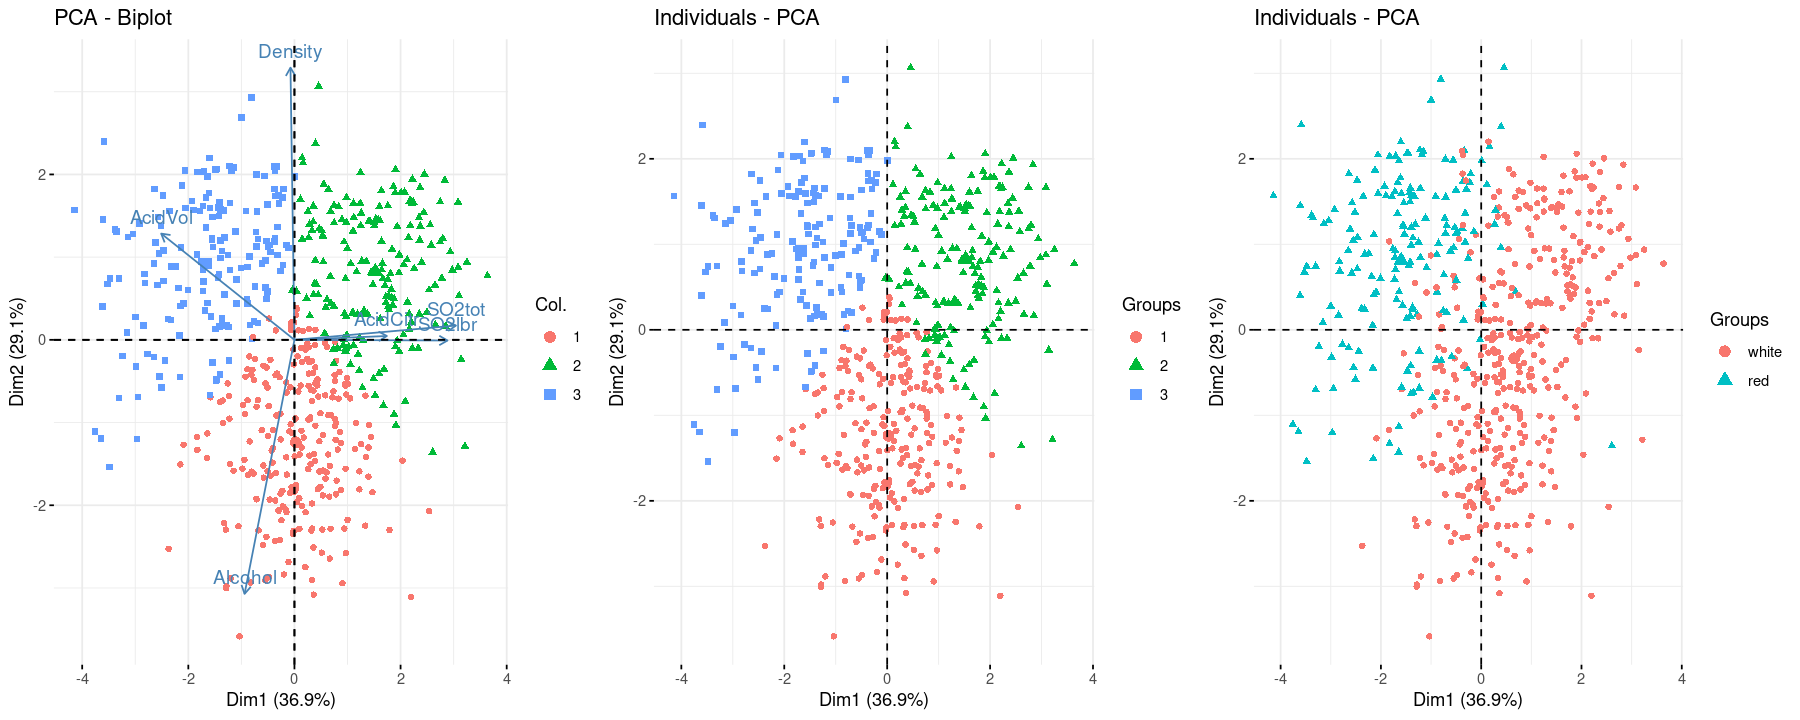

In [19]:
### TO BE COMPLETED ### 
# Clusters vs Type of wine

tbl = table(wine$Type, reskmeans$cluster)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(2:4))

# --- #
options(repr.plot.width = 15, repr.plot.height = 6)

grid.arrange(
    fviz_pca(pca, axes=c(1,2), geom = c("point"), col.ind=as.factor(reskmeans$cluster)),
    fviz_pca_ind(pca, axes=c(1,2), geom=c("point"), habillage=as.factor(reskmeans$cluster)),
    fviz_pca_ind(pca, axes=c(1,2), geom=c("point"), habillage=wine$Type),
    ncol=3
)

In [ ]:
# solutions/kmeans/clust_vs_type.r

        
           1   2   3
  bad      8   4   7
  good    74  21  15
  medium 166 157 148


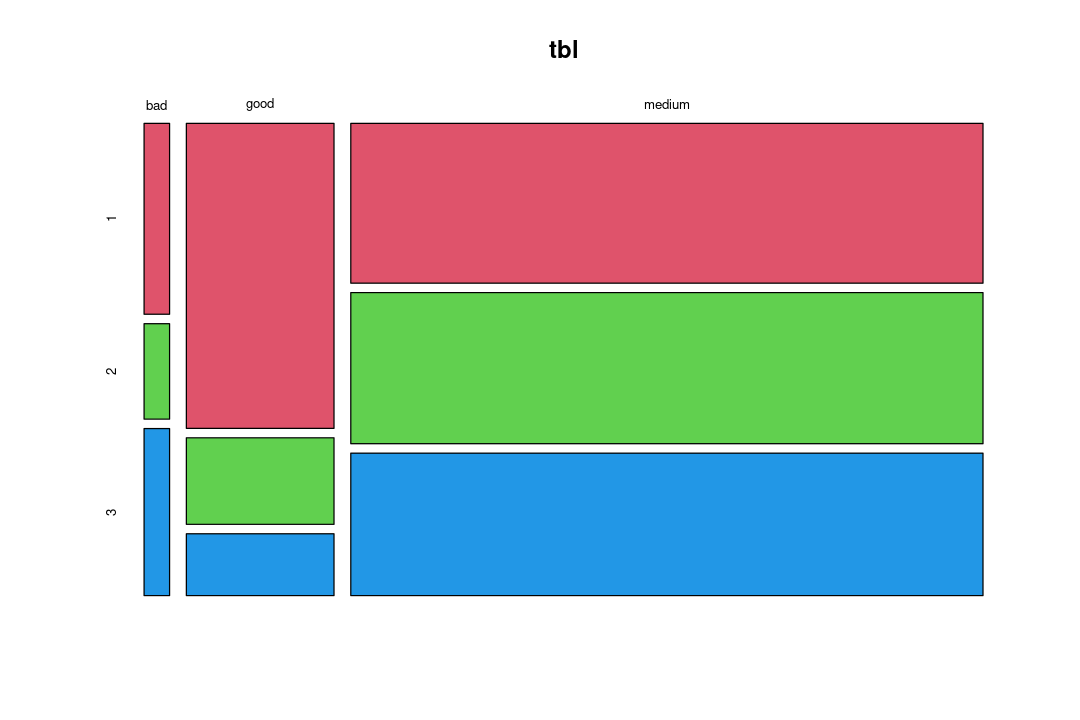

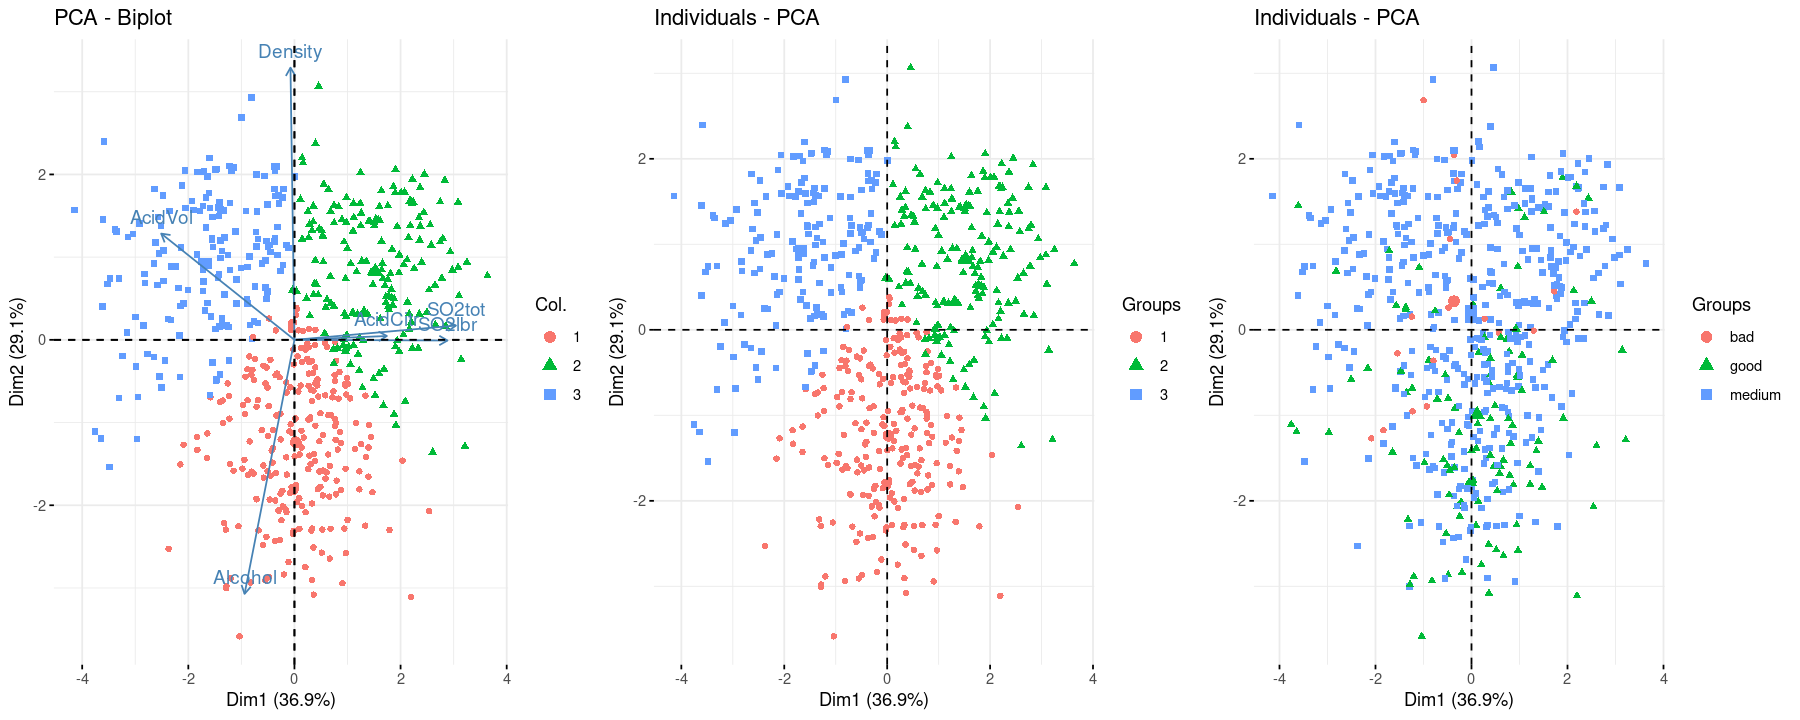

In [20]:
### TO BE COMPLETED ### 
# Clusters vs Quality of the wine
tbl = table(wine$Quality, reskmeans$cluster)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(2:4))

# --- #
options(repr.plot.width = 15, repr.plot.height = 6)

grid.arrange(
    fviz_pca(pca, axes=c(1,2), geom = c("point"), col.ind=as.factor(reskmeans$cluster)),
    fviz_pca_ind(pca, axes=c(1,2), geom=c("point"), habillage=as.factor(reskmeans$cluster)),
    fviz_pca_ind(pca, axes=c(1,2), geom=c("point"), habillage=wine$Quality),
    ncol=3
)

In [ ]:
# solutions/kmeans/clust_vs_quality.r

##### <span style="color:purple">**Todo:** Determine the best value of $k$: </span>

- using the elbow method
- using the silhouette score

**Note**: _One can use the [`fviz_nbclust`](https://search.r-project.org/CRAN/refmans/factoextra/html/fviz_nbclust.html) and [`fviz_silhouette`](https://search.r-project.org/CRAN/refmans/factoextra/html/fviz_silhouette.html) functions of the `factoextra` package_.

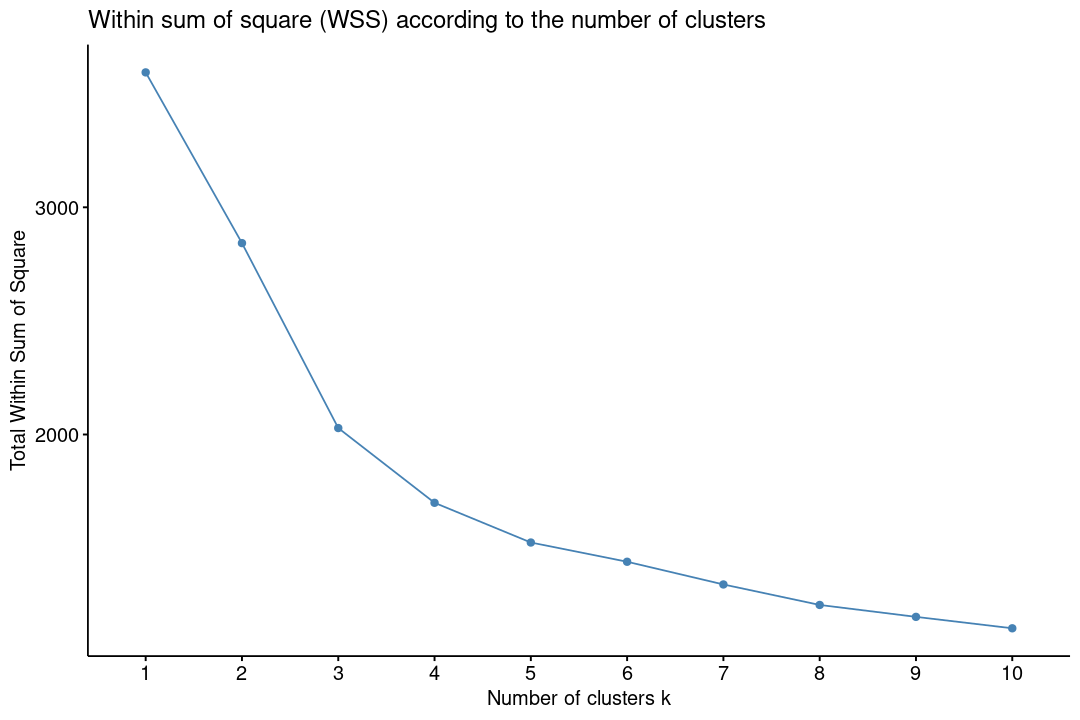

In [21]:
### TO BE COMPLETED ### 
# Elbow method used with total within sum of square as metric

options(repr.plot.width = 9, repr.plot.height = 6)

fviz_nbclust(wine2[,-c(1,2)], FUNcluster=kmeans, method="wss") +
    ggtitle("Within sum of square (WSS) according to the number of clusters")

In [ ]:
# solutions/kmeans/elbow_wss.r

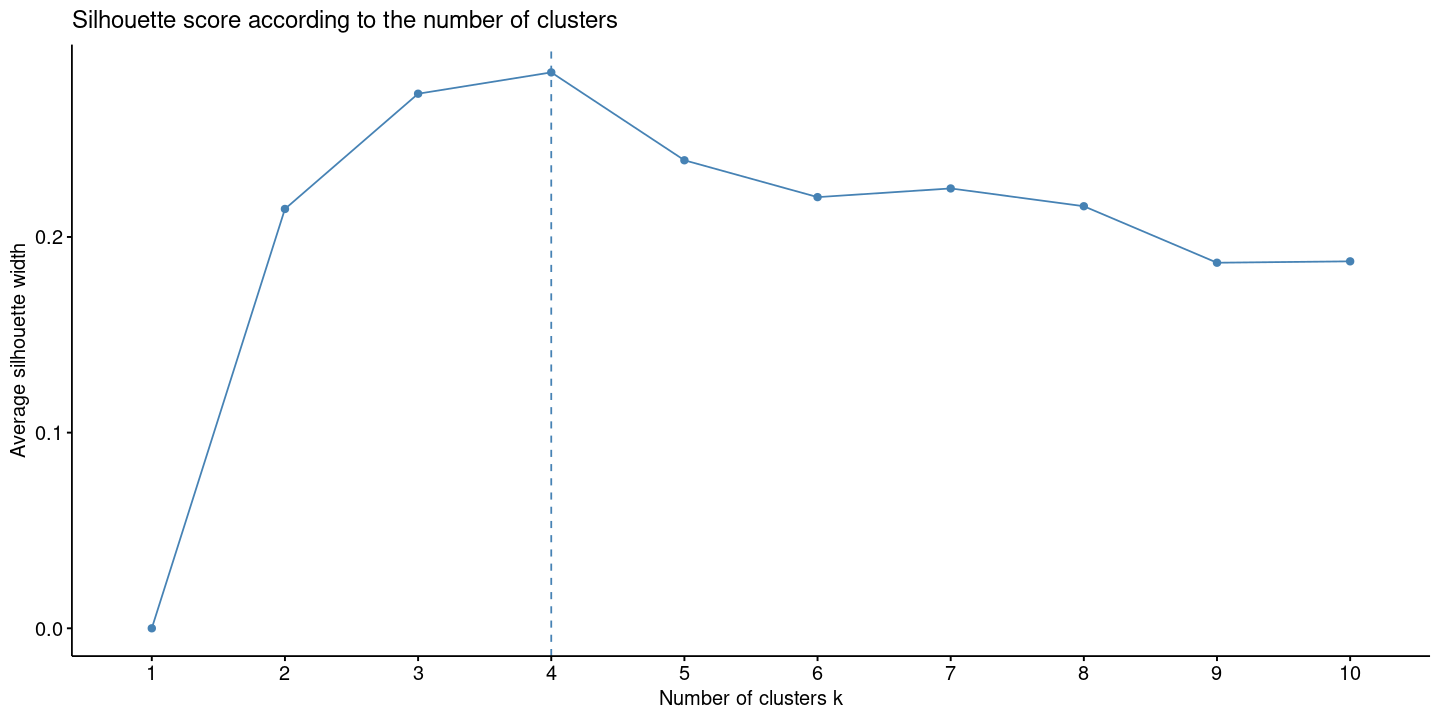

In [30]:
### TO BE COMPLETED ### 
# Elbow method used with silhouette score as metric

fviz_nbclust(wine2[,-c(1,2)], FUNcluster=kmeans, method="silhouette") +
    ggtitle("Silhouette score according to the number of clusters")

In [ ]:
# solutions/kmeans/elbow_silhouette.r

  cluster size ave.sil.width
1       1  170          0.21
2       2  248          0.31
3       3  182          0.28
  cluster size ave.sil.width
1       1  114          0.29
2       2  218          0.33
3       3  100          0.18
4       4  168          0.29


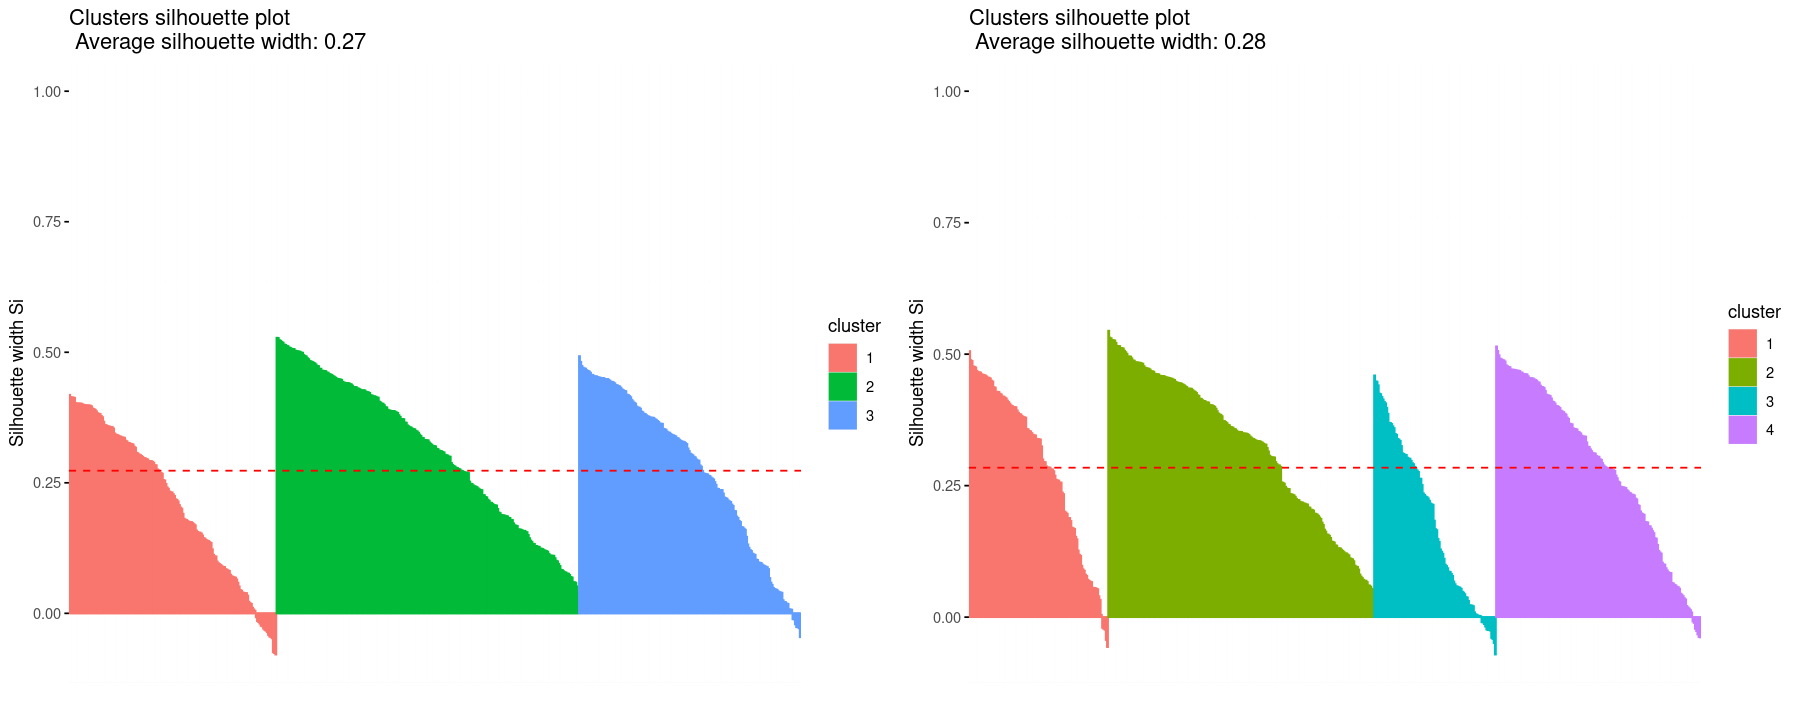

In [24]:
### TO BE COMPLETED ### 
# Silhouette plots, according to the number of clusters

options(repr.plot.width = 15, repr.plot.height = 6)

# With 3 clusters
reskmeans = kmeans(wine2[,-c(1,2)], centers=3) 
sil = silhouette(reskmeans$cluster, dist(wine2[, -c(1:2)]))
p1 = fviz_silhouette(sil)

# With 4 clusters
reskmeans = kmeans(wine2[,-c(1,2)], centers=4) 
sil = silhouette(reskmeans$cluster, dist(wine2[, -c(1:2)]))
p2 = fviz_silhouette(sil)

grid.arrange(p1,p2,ncol=2)

In [ ]:
# solutions/kmeans/plot_silhouette.r

## Clustering with CAH

In this section, we will perform the CAH to make the same analysis as in th preview section.

##### <span style="color:purple">**Todo**: Use the [`hclust`](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/hclust) function to perform a hierarchical classification of the wine data</span>

- Test the different type of linkage : _single_, _complete_ and _average_,
- Graphically, compare the associated dendrograms (_cf._ [`fviz_dend`](https://search.r-project.org/CRAN/refmans/factoextra/html/fviz_dend.html)), and comment on the results.

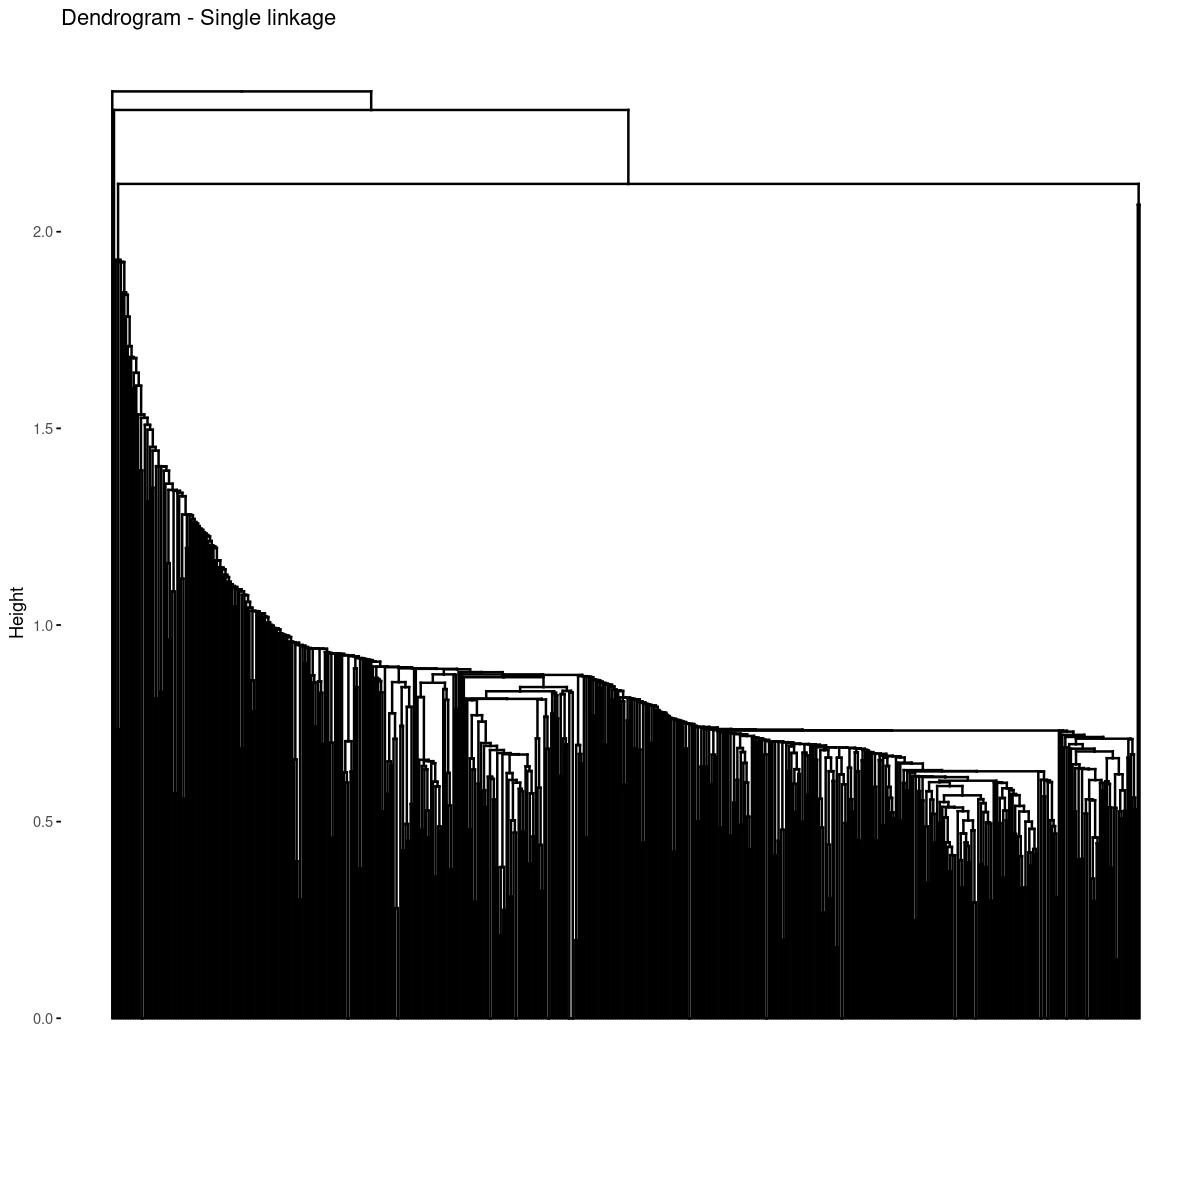

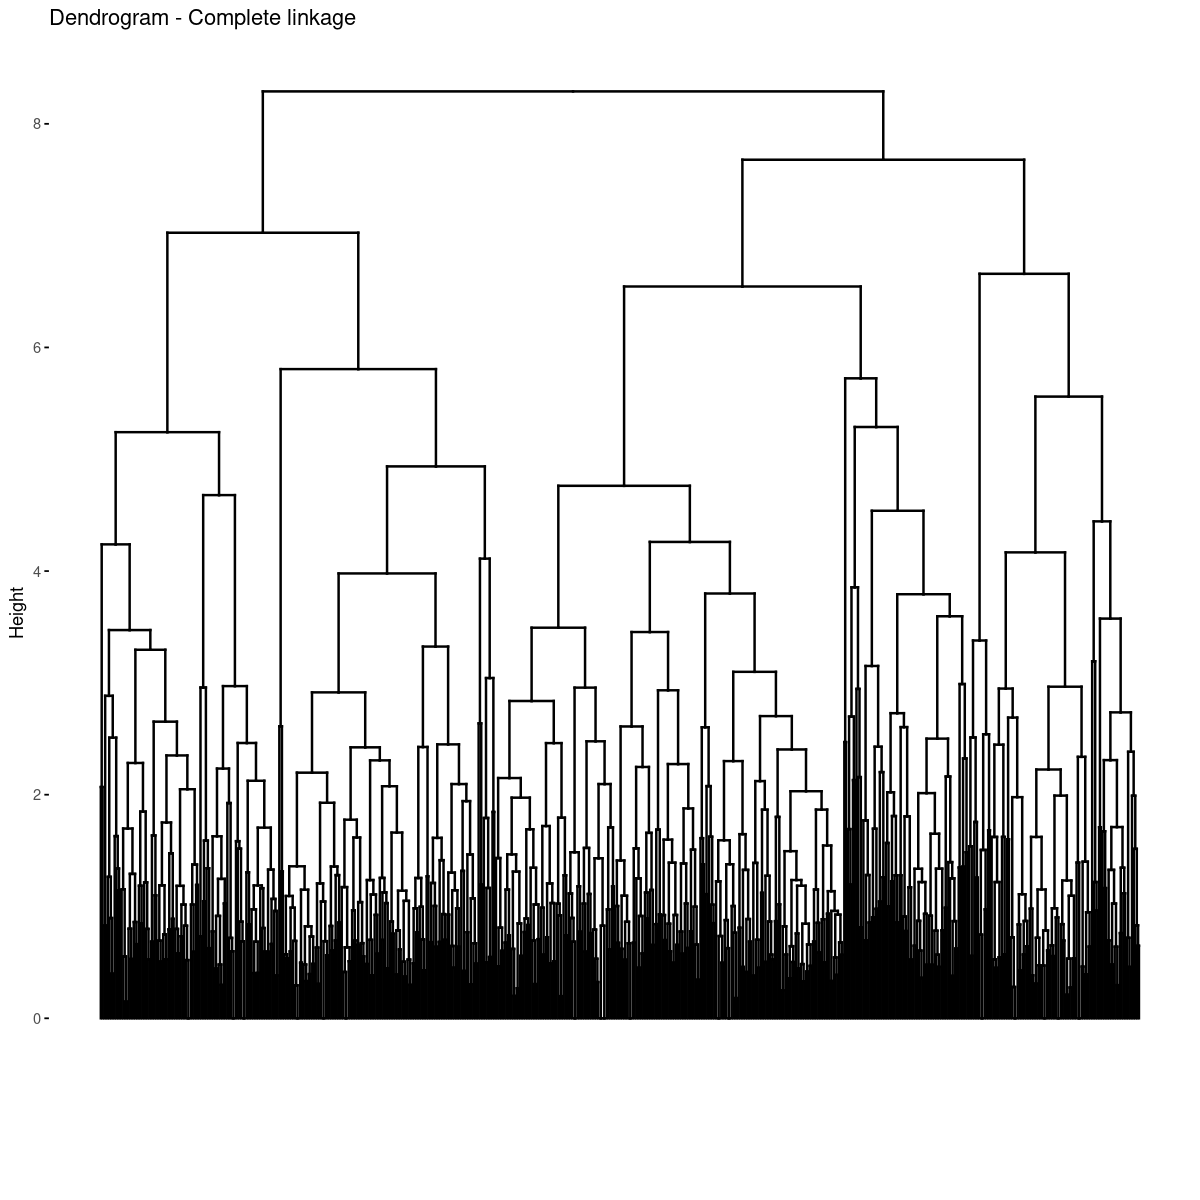

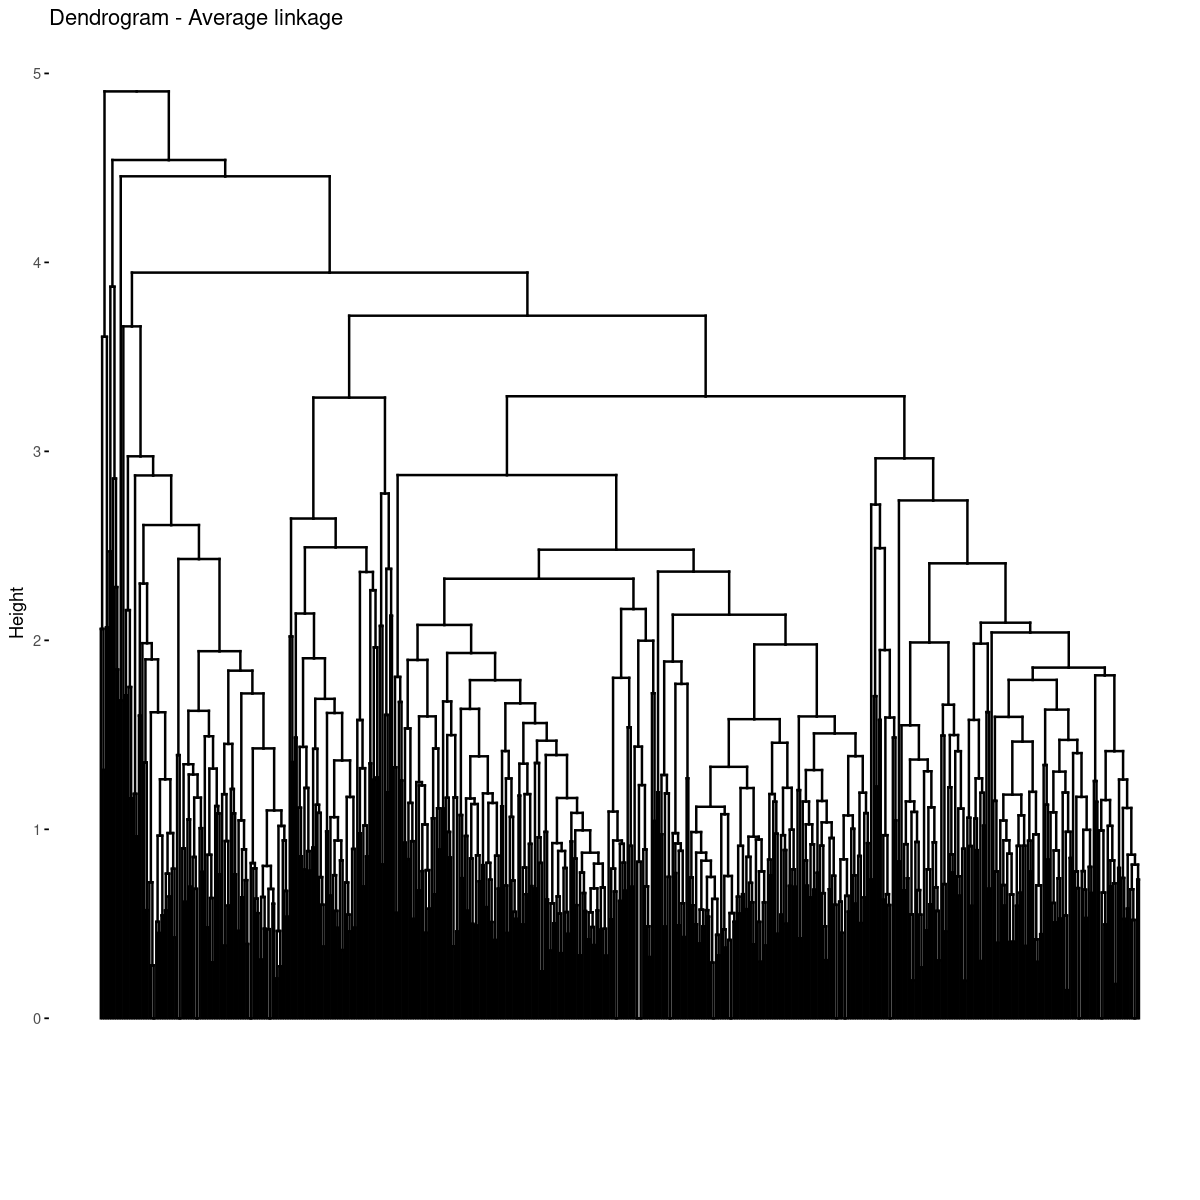

In [27]:
### TO BE COMPLETED ### 

d = dist(wine2[,-c(1,2)], method="euclidean")

# Clustering
hclustsingle = hclust(d, method="single")
hclustcomplete = hclust(d, method="complete")
hclustaverage = hclust(d, method="average")

# --- #

#Dendograms visualization
options(repr.plot.width=10, repr.plot.height=10)

fviz_dend(hclustsingle, show_labels=FALSE, main='Dendrogram - Single linkage')
fviz_dend(hclustcomplete, show_labels=FALSE, main='Dendrogram - Complete linkage')
fviz_dend(hclustaverage, show_labels=FALSE, main='Dendrogram - Average linkage')

In [ ]:
# solutions/cah/cah.r

##### <span style="color:purple">**Todo:** Find the appropriate number of clusters for the _complete_ linkage ($\texttt{hclustcomplete}$) by using the both methods (_wss_ and _silhouette_)</span>

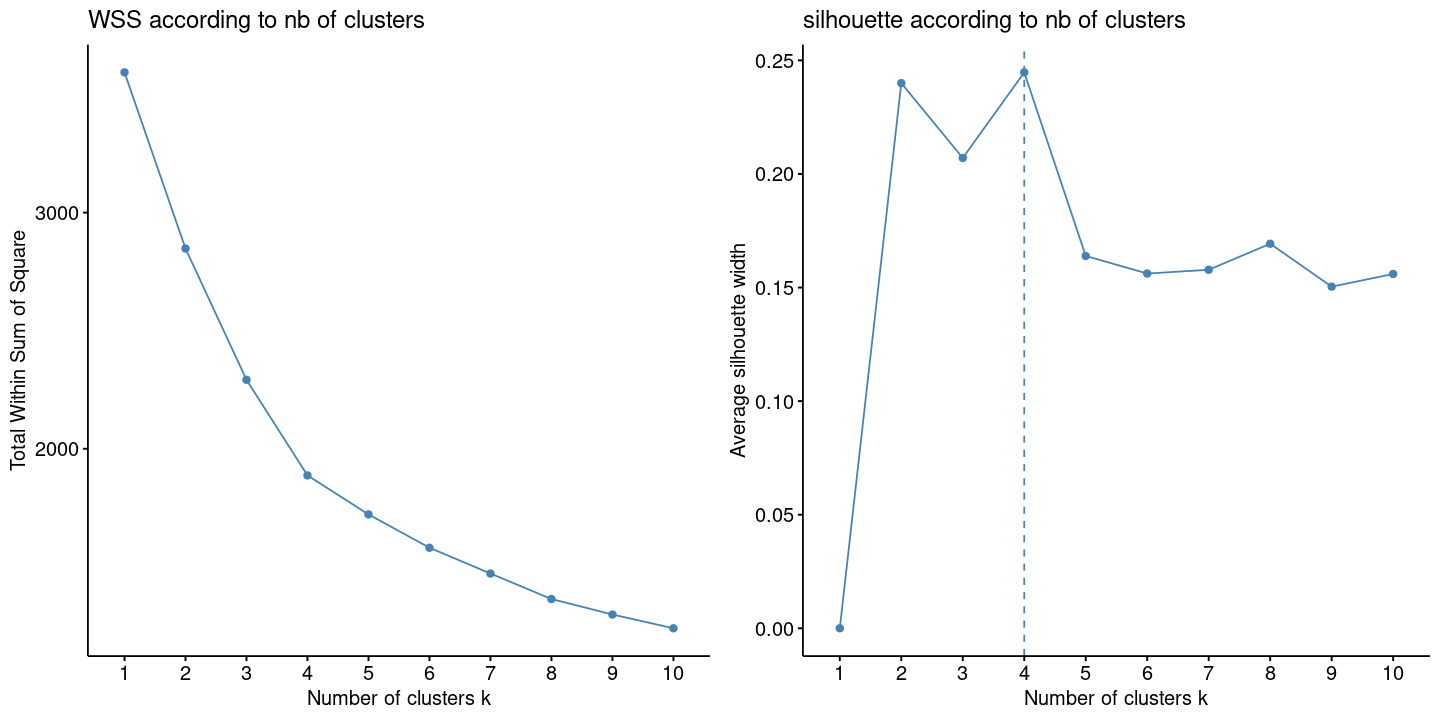

In [29]:
### TO BE COMPLETED ### 
options(repr.plot.width = 12, repr.plot.height = 6)

grid.arrange(
    fviz_nbclust(wine2[,-c(1,2)], FUNcluster=hcut, method="wss") + ggtitle("WSS according to nb of clusters"),
    fviz_nbclust(wine2[,-c(1,2)], FUNcluster=hcut, method="silhouette") + ggtitle("silhouette according to nb of clusters"),
    ncol=2
)

In [ ]:
# solutions/cah/cah_nb.r

##### <span style="color:purple">**Todo:** Get a 3 classes cluster of wines, for the the _complete_ linkage ($\texttt{hclustcomplete}$).</span>
- You may use the [`cutetree`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/cutree.html) function,
- View the dendrogram associated with this cut (_cf._ [`fviz_dend`](https://search.r-project.org/CRAN/refmans/factoextra/html/fviz_dend.html)),
- Explain clusters with qualitative variables.

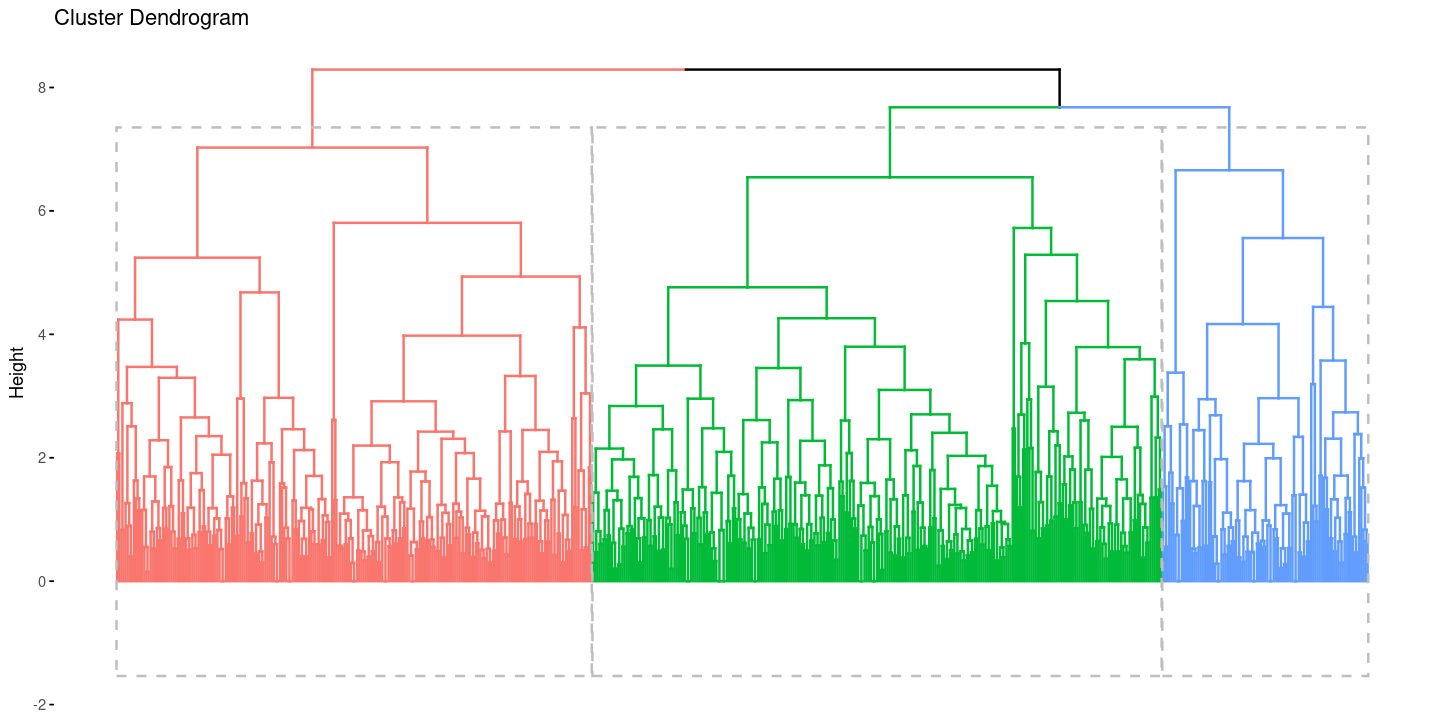

In [32]:
### TO BE COMPLETED ### 

reshclust = cutree(hclustcomplete, 3)

# --- #

fviz_dend(hclustcomplete, k=3, show_labels=FALSE, rect=TRUE)

In [ ]:
# solutions/cah/cah_cut.r

       reshclust
          1   2   3
  white  20 178 227
  red    79  95   1


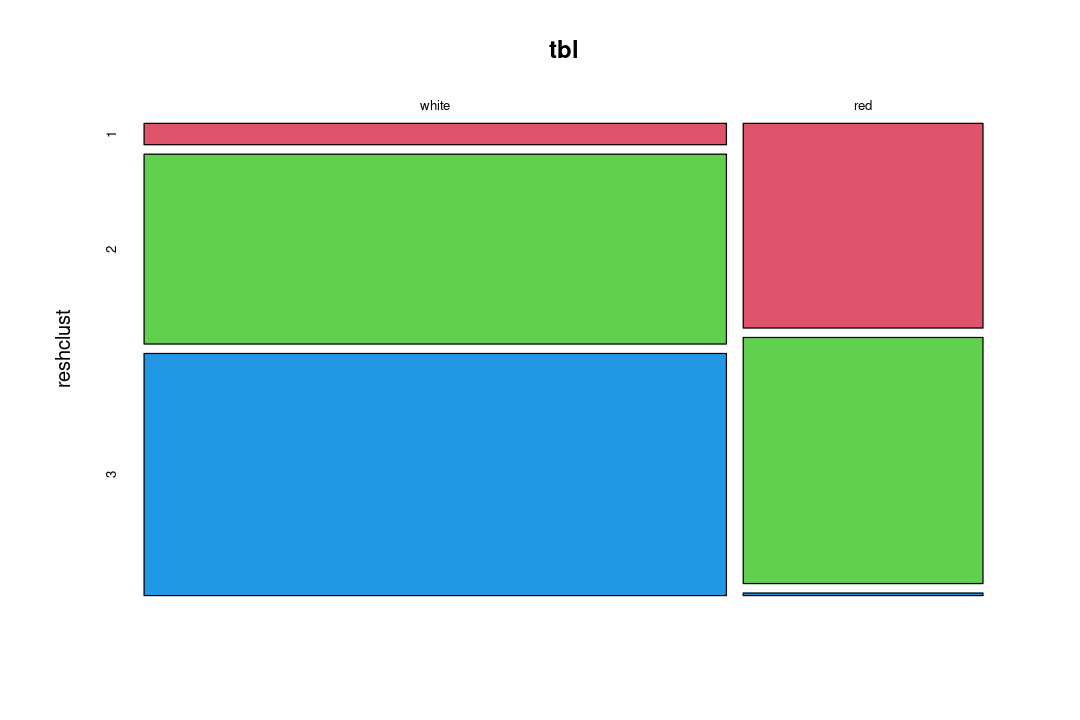

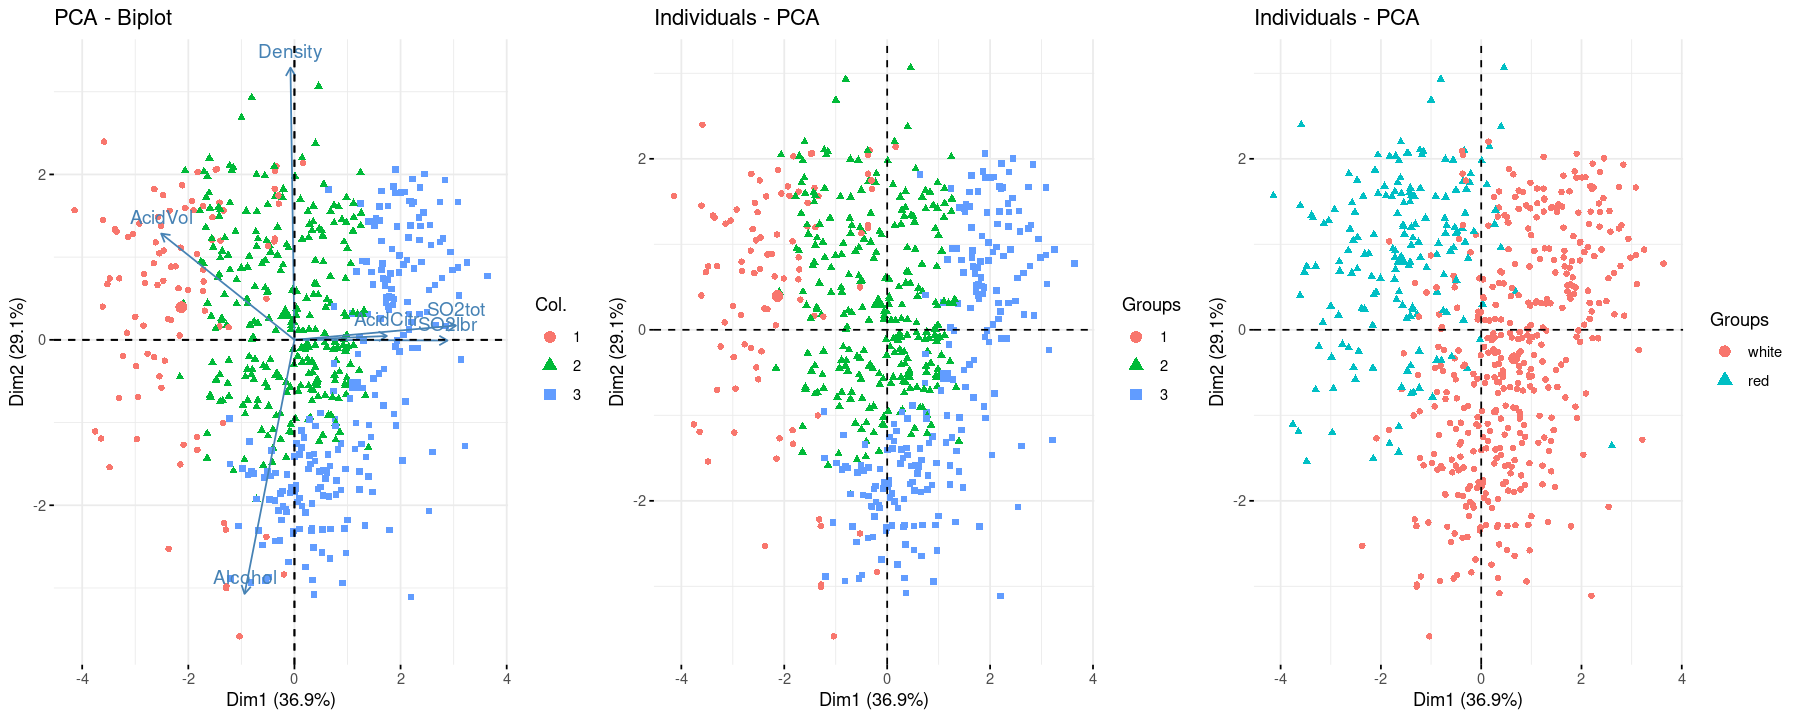

In [33]:
### TO BE COMPLETED ### 
# Clusters vs Type of wine

tbl = table(wine$Type, reshclust)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(2:4))

# --- #
options(repr.plot.width = 15, repr.plot.height = 6)

grid.arrange(
    fviz_pca(pca, axes=c(1,2), geom = c("point"), col.ind=as.factor(reshclust)),
    fviz_pca_ind(pca, axes=c(1,2), geom=c("point"), habillage=as.factor(reshclust)),
    fviz_pca_ind(pca, axes=c(1,2), geom=c("point"), habillage=wine$Type),
    ncol=3
)

In [ ]:
# solutions/cah/clust_vs_type.r

        reshclust
           1   2   3
  bad      6   9   4
  good    13  39  58
  medium  80 225 166


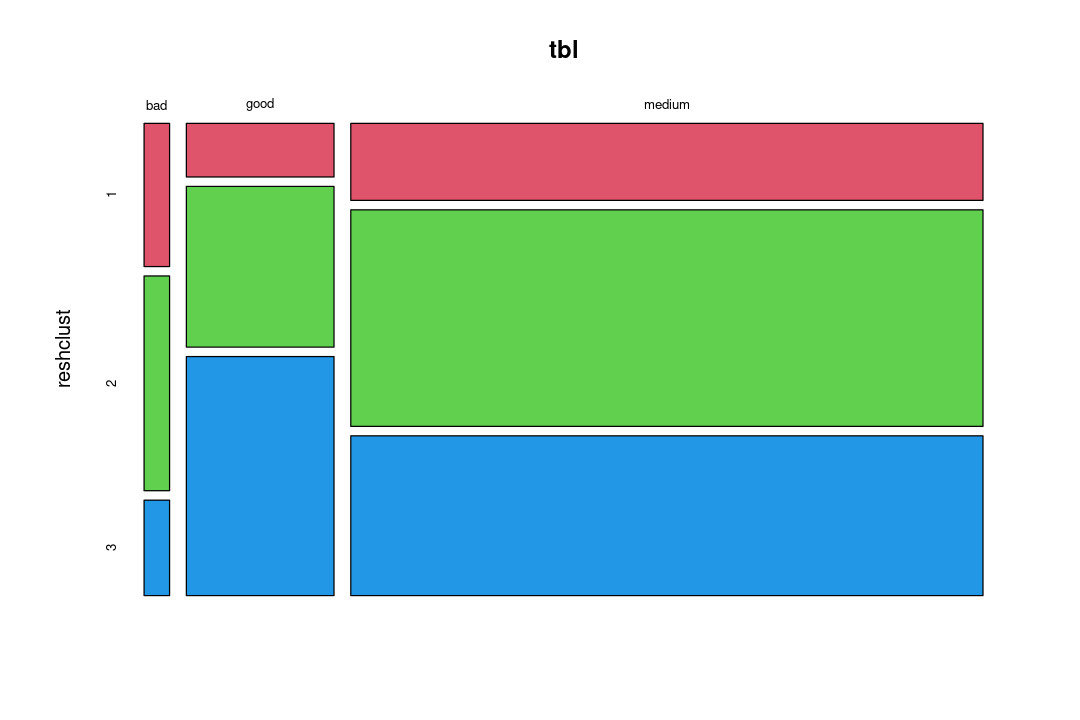

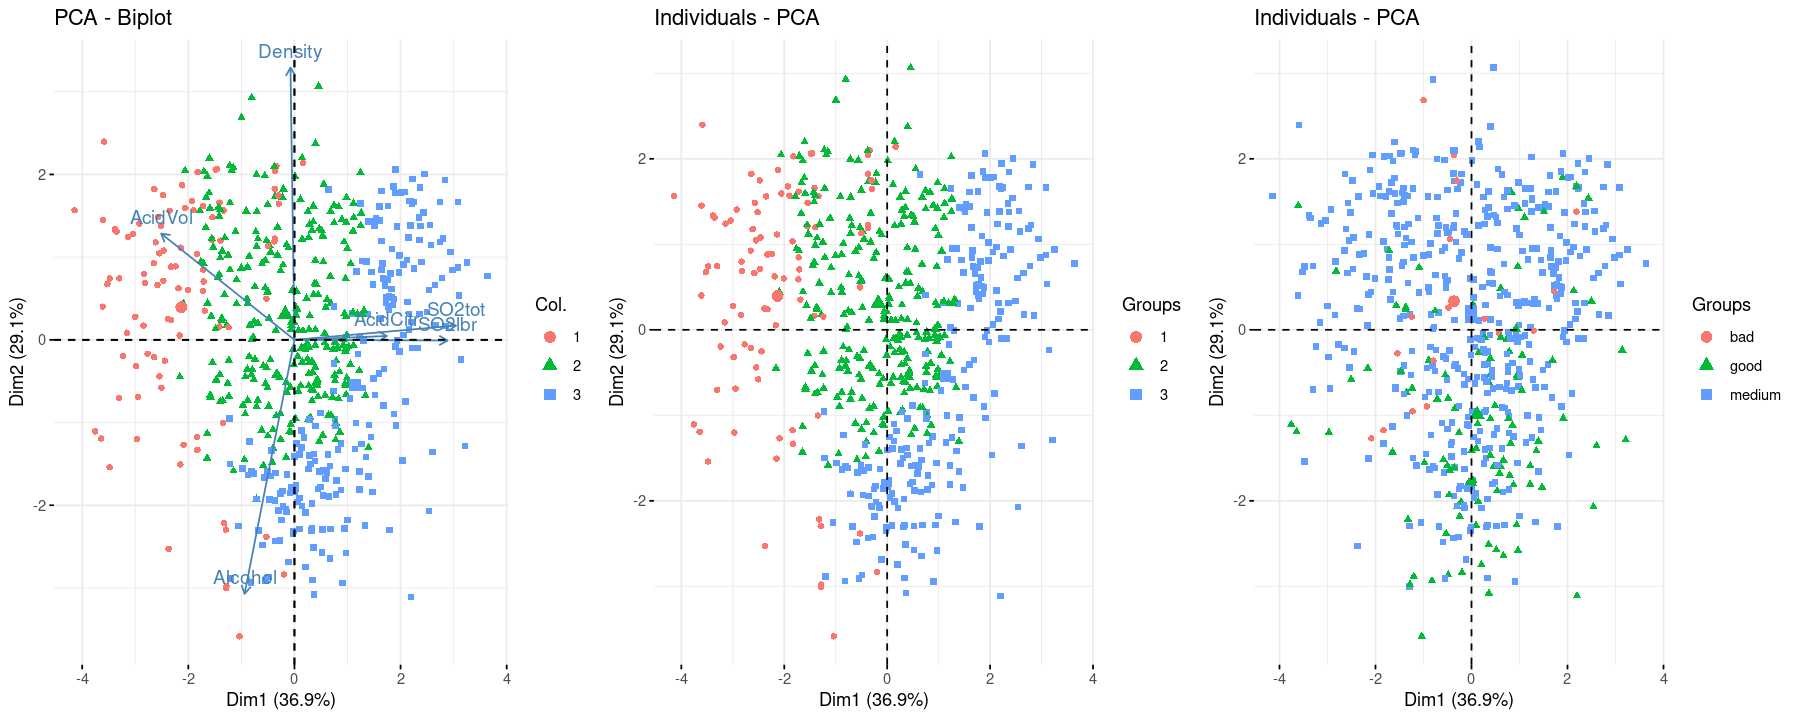

In [34]:
### TO BE COMPLETED ### 
# Clusters vs Quality of wine
tbl = table(wine$Quality, reshclust)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(2:4))

# --- #
options(repr.plot.width = 15, repr.plot.height = 6)

grid.arrange(
    fviz_pca(pca, axes=c(1,2), geom = c("point"), col.ind=as.factor(reshclust)),
    fviz_pca_ind(pca, axes=c(1,2), geom=c("point"), habillage=as.factor(reshclust)),
    fviz_pca_ind(pca, axes=c(1,2), geom=c("point"), habillage=wine$Quality),
    ncol=3
)

In [ ]:
# solutions/cah/clust_vs_quality.r

## Clustering with Gaussian Mixture

In this part, we will do the same analysis as above by with the GMM method.

In [36]:
install.packages('mclust')
library(mclust)

Installation du package dans ‘/home/mbui/R/libs’
(car ‘lib’ n'est pas spécifié)

Package 'mclust' version 6.1
Type 'citation("mclust")' for citing this R package in publications.



##### <span style="color:purple">**Todo:** Perform GMM clustering. </span>
- You may use the [`Mclust`](https://www.rdocumentation.org/packages/mclust/versions/5.4.6/topics/Mclust) function of the `mclust` package,
- Select the best model for the _BIC_ criteria (_cf._ [`fviz_mclust`](https://search.r-project.org/CRAN/refmans/factoextra/html/fviz_mclust.html)),
- Visualize the obtained clusters.

In [37]:
wine3 = wine2[, -c(1, 2)]

Best BIC values:
             VVE,9       EVE,7       EVE,6
BIC      -8473.812 -8528.16200 -8535.00101
BIC diff     0.000   -54.35002   -61.18904

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVE (ellipsoidal, equal orientation) model with 9 components: 

 log-likelihood   n  df       BIC       ICL
      -3817.907 600 131 -8473.812 -8644.462

Clustering table:
  1   2   3   4   5   6   7   8   9 
 94  51  32 106  22 156  63  47  29 

Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
ℹ Please use `gather()` instead.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>.”


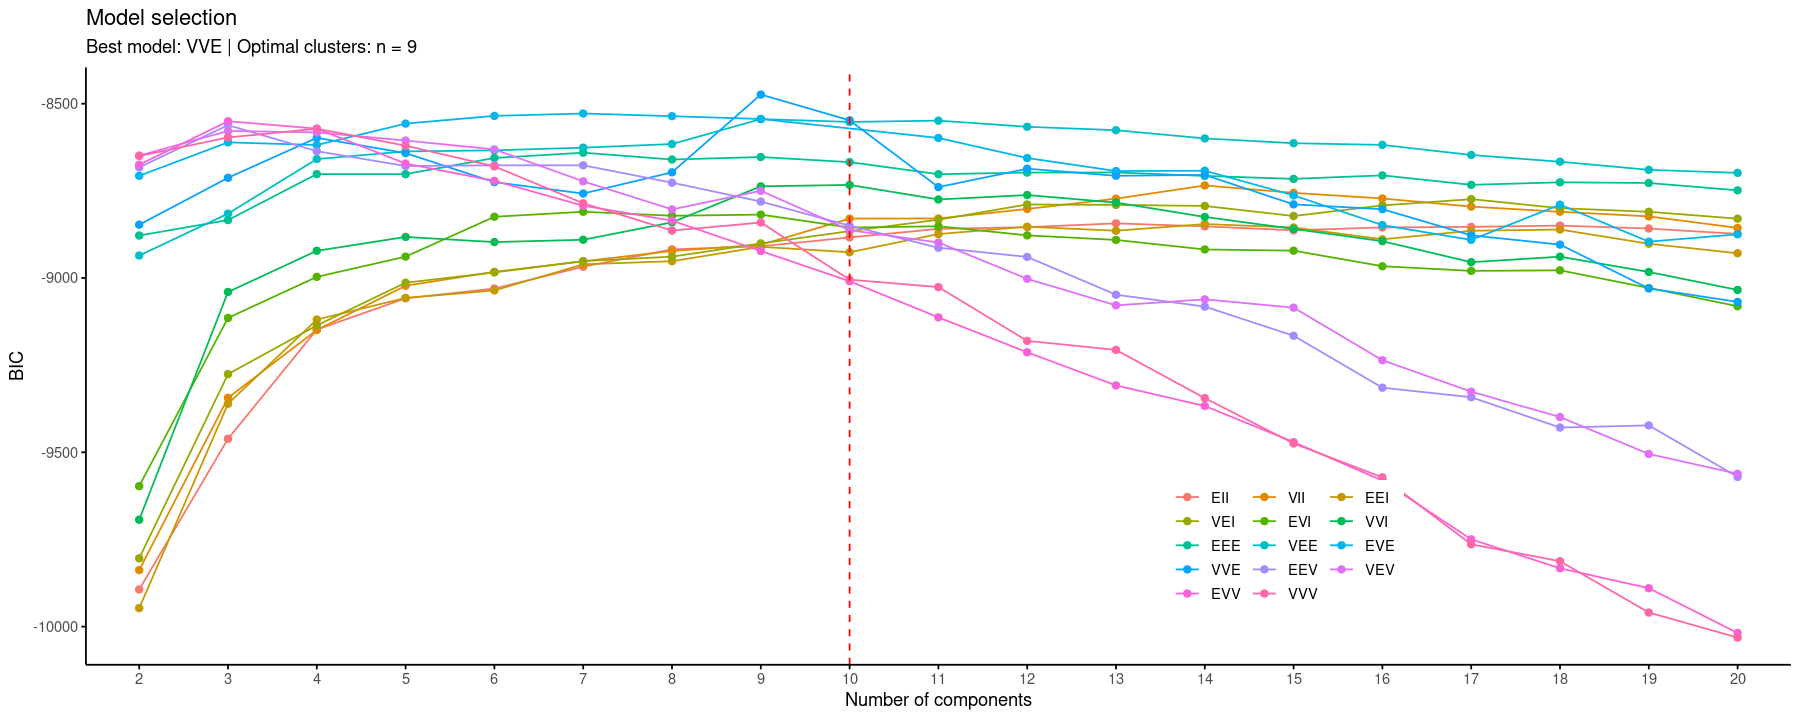

In [38]:
### TO BE COMPLETED ### 
# GMM with BIC

resBICall = mclustBIC(wine3, G=2:20)
summary(resBICall)

# --- #

resBICall = Mclust(wine3, G=2:20)
summary(resBICall)

fviz_mclust(resBICall, what="BIC")

In [ ]:
# solutions/gmm/gmm_bic.r

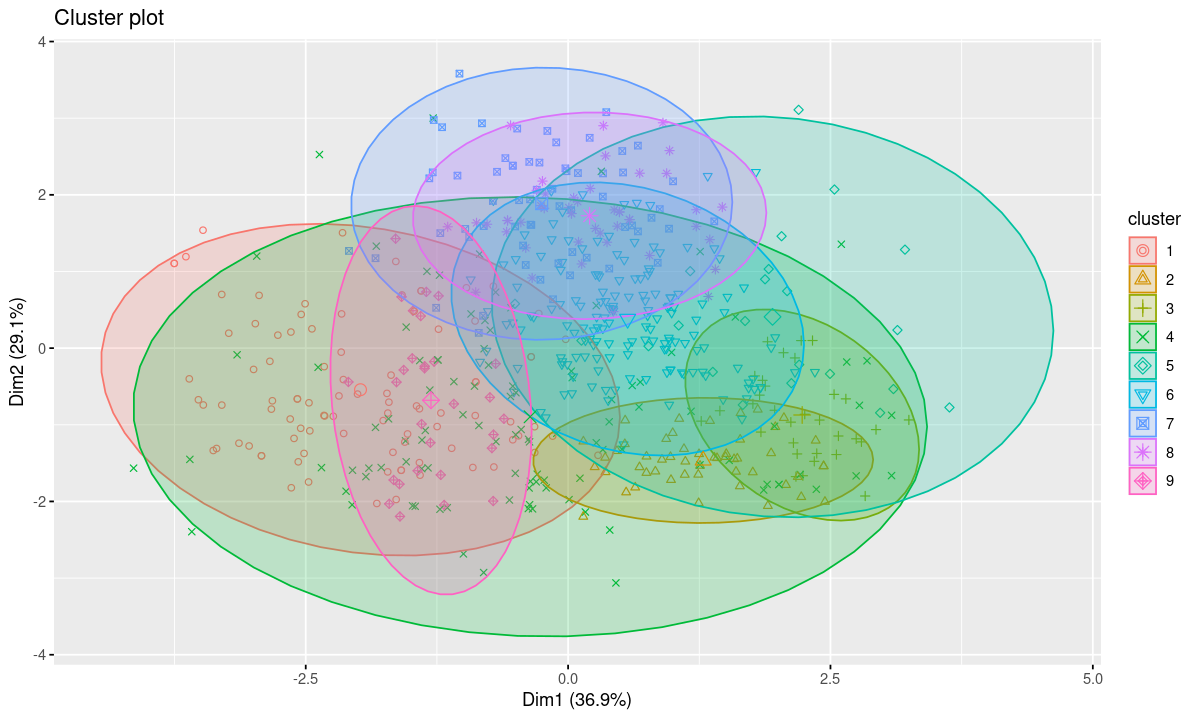

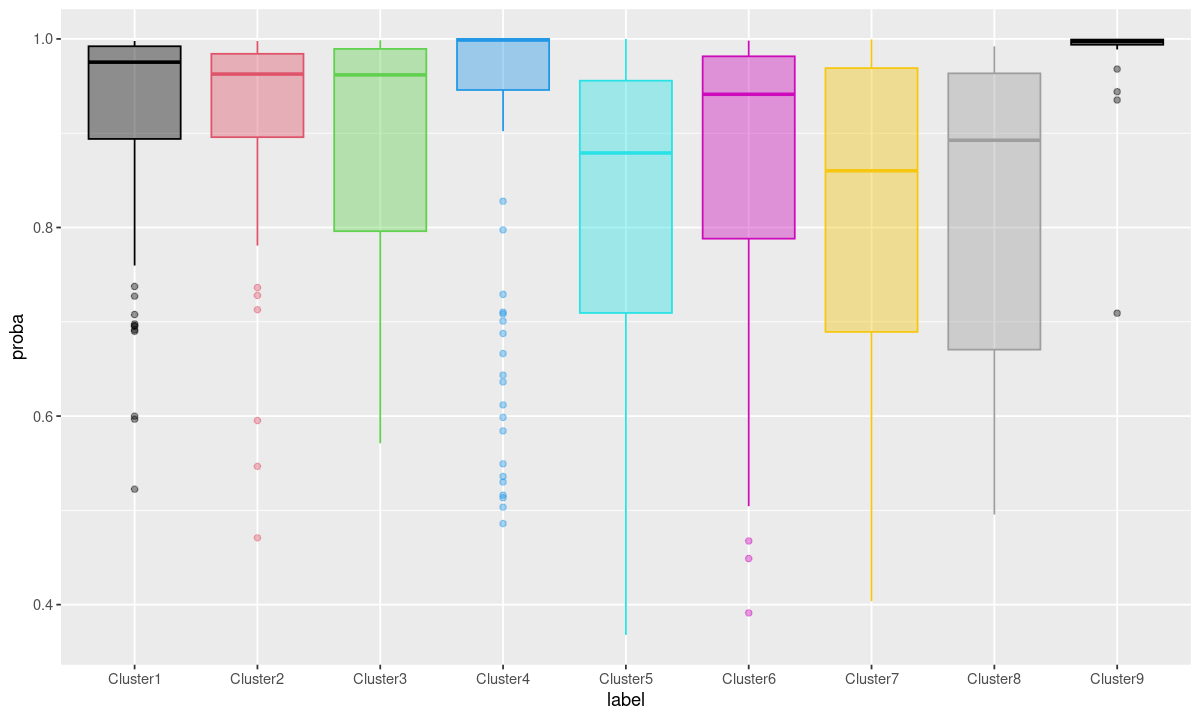

In [39]:
### TO BE COMPLETED ### 
# Best model with BIC
options(repr.plot.width = 10, repr.plot.height = 6)

resBIC = Mclust(wine3, G=9, modelNames = "VVE")
fviz_cluster(resBIC, data=wine3, ellipse.type="norm", geom="point")

# --- #

aux = data.frame(
    label = paste("Cluster", resBIC$classification, sep=""), 
    proba = apply(resBIC$z, 1, max))

ggplot(aux, aes(x=label, y=proba)) + 
    geom_boxplot(colour=1:9, fill=1:9, alpha=.4)

In [ ]:
# solutions/gmm/gmm_best_bic.r

##### <span style="color:purple">**Todo:** Redo the same analysis with the _ICL_ criteria. </span>
- You may use the [`Mclust`](https://www.rdocumentation.org/packages/mclust/versions/5.4.6/topics/Mclust) function of the `mclust` package,
- Select the best model for the _ICL_ criteria (_cf._ [`fviz_mclust`](https://search.r-project.org/CRAN/refmans/factoextra/html/fviz_mclust.html)),
- Visualize the obtained clusters.

In [47]:
### TO BE COMPLETED ### 
# GMM with ICL

resICLall = mclustICL(wine3, G=2:20)
summary(resICLall)

# --- #

resICLall = Mclust(wine3, G=2:20)
summary(resICLall)

Best ICL values:
             EVV,3       VVE,9       EEV,3
ICL      -8628.533 -8644.46196 -8648.00671
ICL diff     0.000   -15.92897   -19.47373

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVE (ellipsoidal, equal orientation) model with 9 components: 

 log-likelihood   n  df       BIC       ICL
      -3817.907 600 131 -8473.812 -8644.462

Clustering table:
  1   2   3   4   5   6   7   8   9 
 94  51  32 106  22 156  63  47  29 

In [ ]:
# solutions/gmm/gmm_icl.r

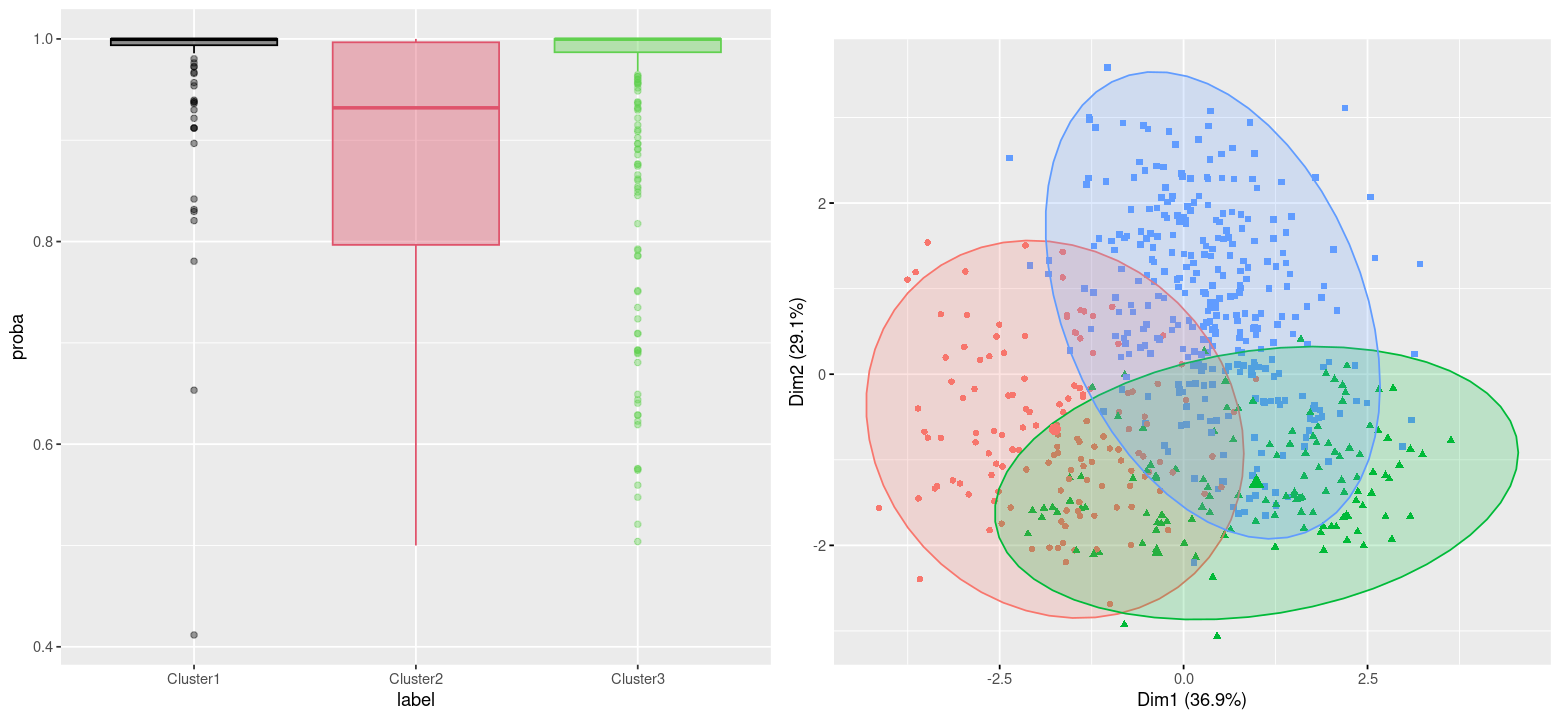

In [48]:
### TO BE COMPLETED ### 
# Best model with ICL
options(repr.plot.width = 13, repr.plot.height = 6)

resICL = Mclust(wine3, G=3, modelNames="EVV")
# fviz_cluster(resICL, data=wine3, ellipse.type="norm", geom="point")

# --- #

aux = data.frame(
    label = paste("Cluster", resICL$classification, sep=""), 
    proba = apply(resICL$z, 1, max))

p1 = ggplot(aux, aes(x=label, y=proba)) + geom_boxplot(colour=1:3, fill=1:3, alpha=.4)
p2 = fviz_cluster(resICL, data=wine3, ellipse.type="norm", geom="point") +
    ggtitle("") + theme(legend.position = "none")

grid.arrange(p1, p2, ncol = 2)

In [ ]:
# solutions/gmm/gmm_best_icl.r

##### <span style="color:purple">**Question:** Which _GMM_ model to choose?</span>

##### <span style="color:purple">**Todo:** Analyze cluster with qualitative variables.</span>

       
          1   2   3
  white   7 100 318
  red   140  30   5


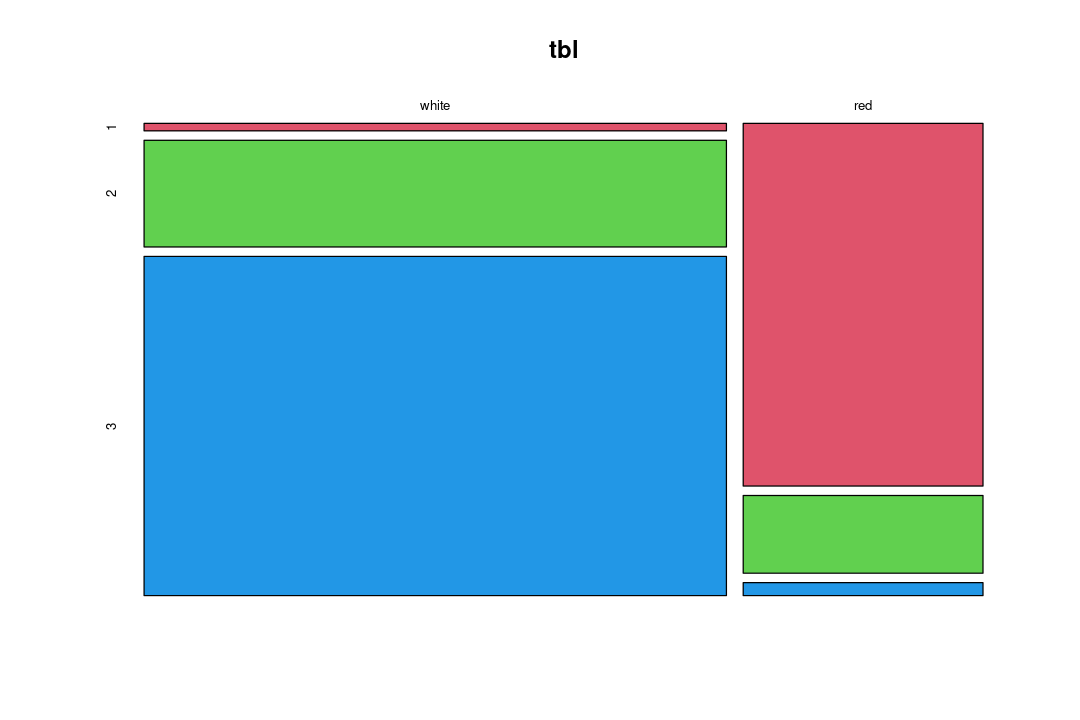

        
           1   2   3
  bad      1   7  11
  good    20   5  85
  medium 126 118 227


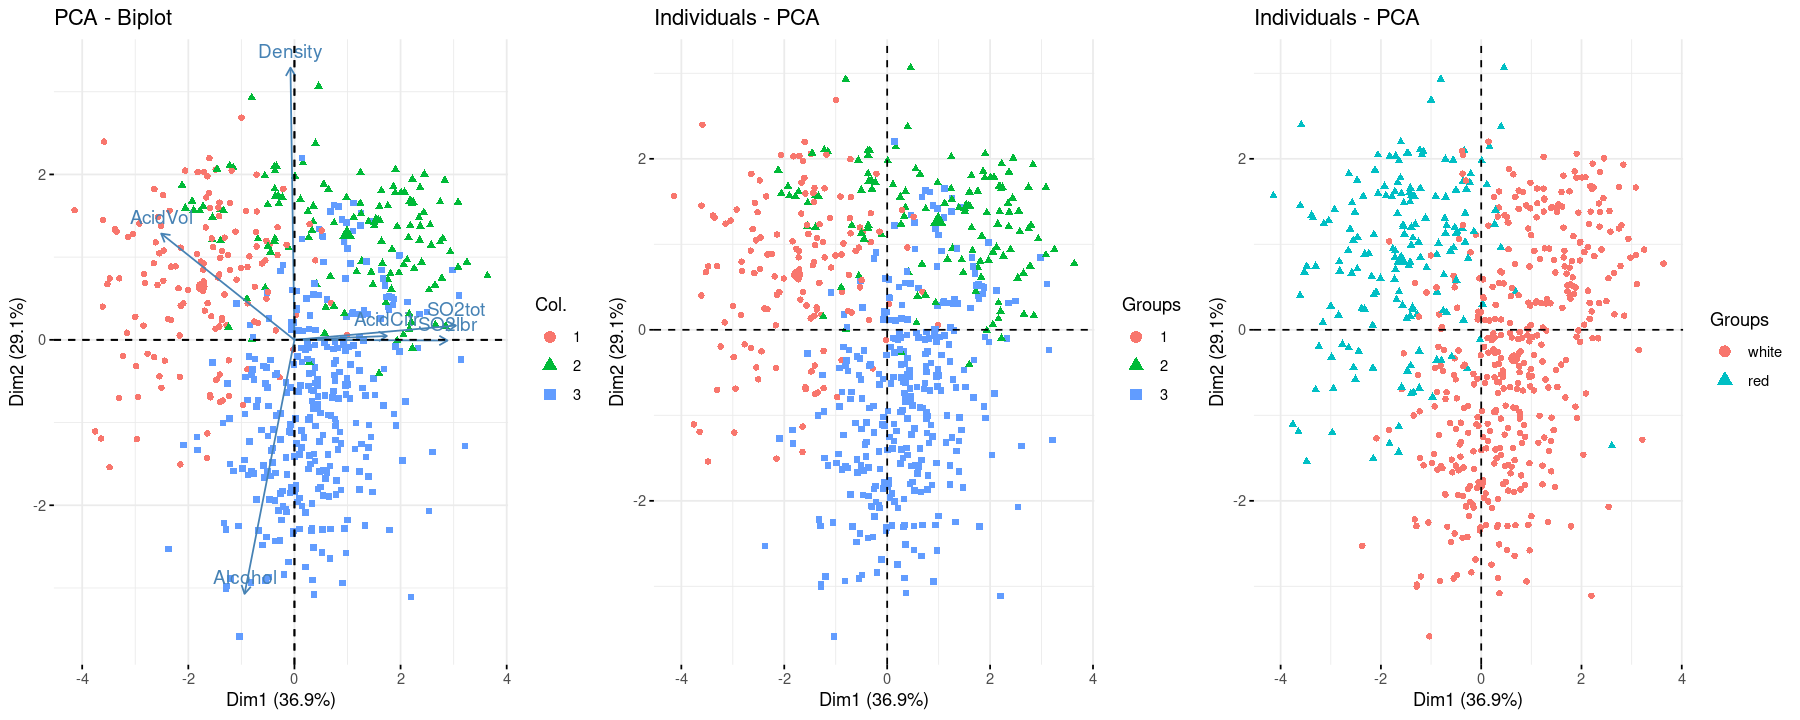

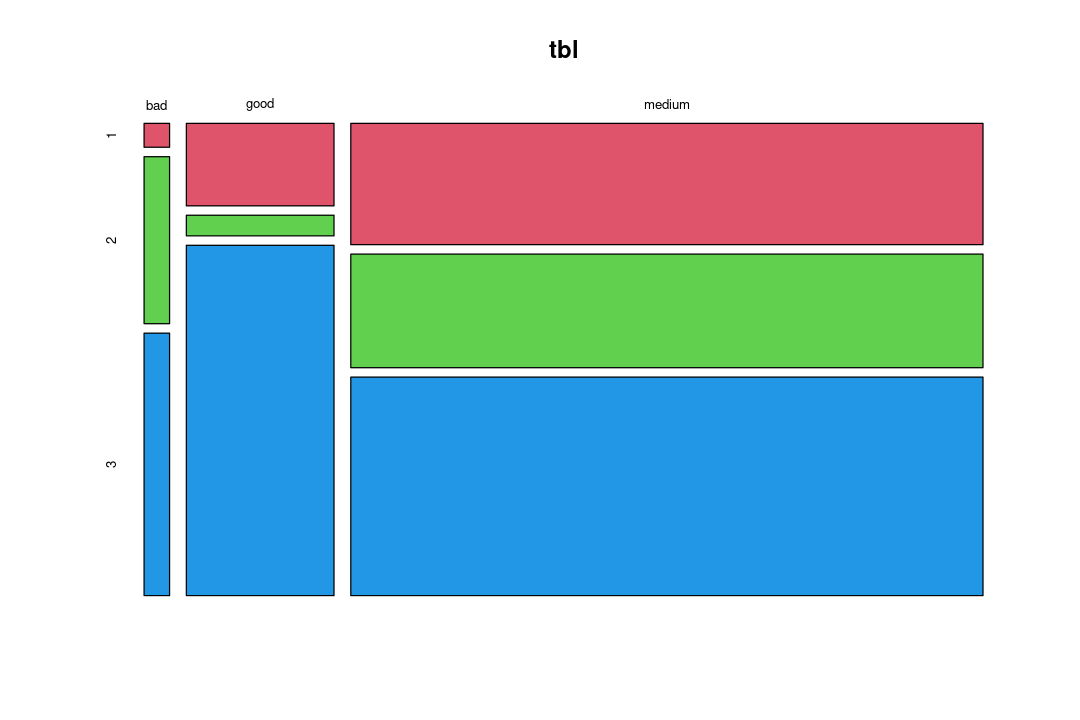

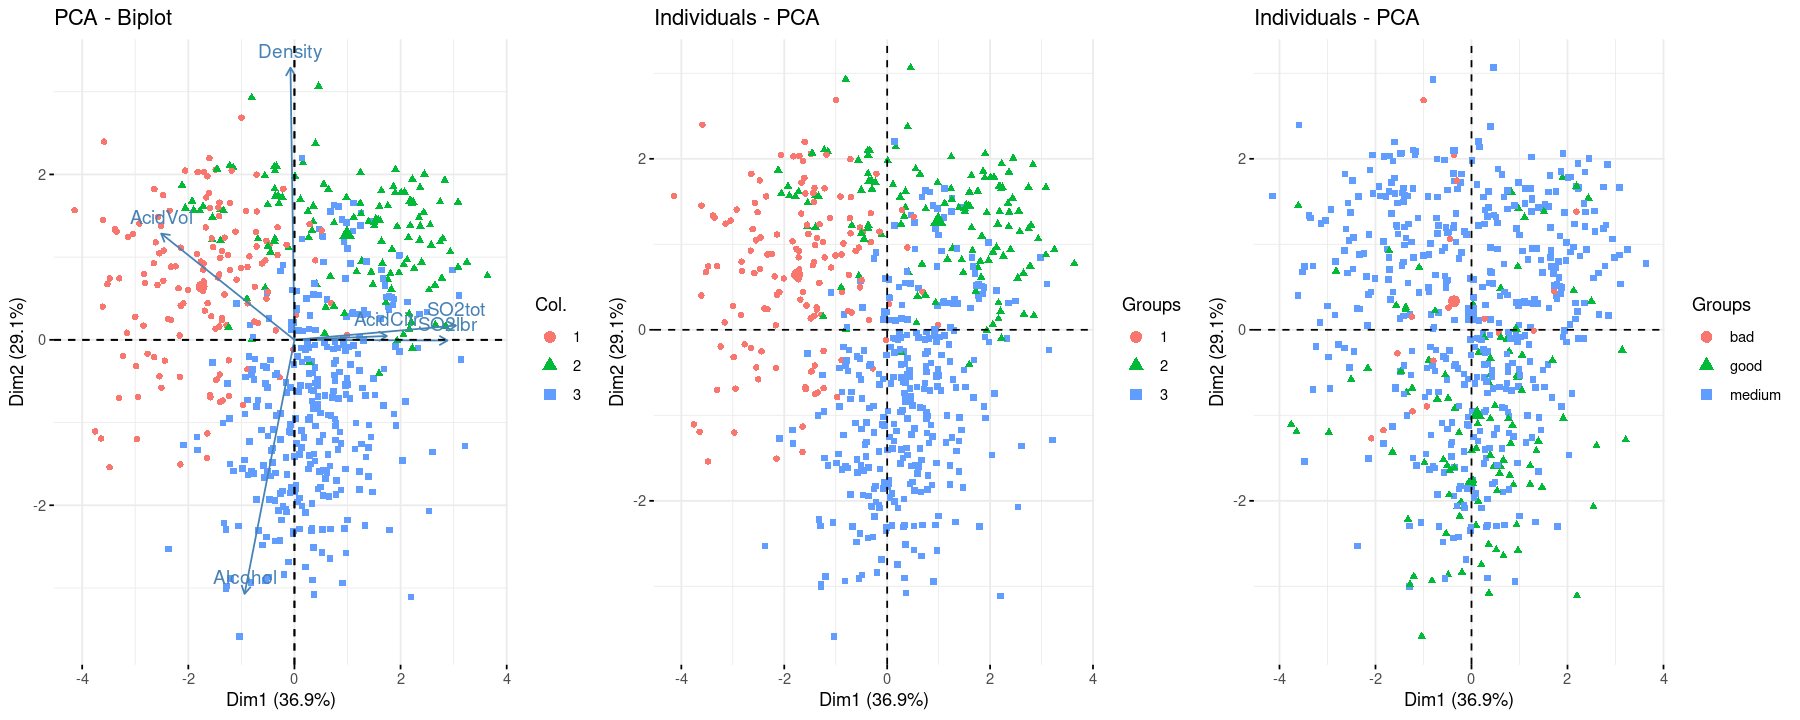

In [46]:
### TO BE COMPLETED ### 
# Cluster vs Type

tbl = table(wine2$Type, resICL$classification)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(2:4))

# --- #
options(repr.plot.width = 15, repr.plot.height = 6)

grid.arrange(
    fviz_pca(pca, axes=c(1,2), geom = c("point"), col.ind=as.factor(resICL$classification)),
    fviz_pca_ind(pca, axes=c(1,2), geom=c("point"), habillage=as.factor(resICL$classification)),
    fviz_pca_ind(pca, axes=c(1,2), geom=c("point"), habillage=wine$Type),
    ncol=3
)

# --- #
# Cluster vs Quality

tbl = table(wine$Quality, resICL$classification)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(2:4))

# --- #
options(repr.plot.width = 15, repr.plot.height = 6)

grid.arrange(
    fviz_pca(pca, axes=c(1,2), geom = c("point"), col.ind=as.factor(resICL$classification)),
    fviz_pca_ind(pca, axes=c(1,2), geom=c("point"), habillage=as.factor(resICL$classification)),
    fviz_pca_ind(pca, axes=c(1,2), geom=c("point"), habillage=wine$Quality),
    ncol=3
)

In [ ]:
# solutions/gmm/quali.r

## Comparison of clustering algorithms

The purpose of this last section is to compare the different results we obtained previously.

### $k$-means _vs._ CAH

In [56]:
install.packages('ggimage')
library(cvms)
library(ggimage)
library(rsvg)

Installation du package dans ‘/home/mbui/R/libs’
(car ‘lib’ n'est pas spécifié)

installation de la dépendance ‘magick’


Warning message in install.packages("ggimage"):
“l'installation du package ‘magick’ a eu un statut de sortie non nul”
Warning message in install.packages("ggimage"):
“l'installation du package ‘ggimage’ a eu un statut de sortie non nul”


ERROR: Error in library(ggimage): aucun package nommé ‘ggimage’ n'est trouvé


In [57]:
# We remain that best model for these algorithms are:

reskmeans = kmeans(wine2[,-c(1,2)], centers=3)
ClassK3 = cutree(hclustcomplete, 3)

##### <span style="color:purple">**Todo:** Visualize clusters of these models on the principal component plane</span>

In [ ]:
### TO BE COMPLETED ### 


In [ ]:
# solutions/compare/cah_vs_kmeans.r

##### <span style="color:purple">**Todo:** Analyze the result obtained with the `table` function</span>

In [ ]:
### TO BE COMPLETED ### 


In [ ]:
# solutions/compare/cah_vs_kmeans_conf.r

### $k$-means _vs._ GMM

##### <span style="color:purple">**Todo:** Do the same analysis as for $k$-means _vs._ GMM</span>

In [ ]:
### TO BE COMPLETED ### 


In [ ]:
# solutions/compare/gmm_vs_kmeans.r

### CAH _vs._ GMM

##### <span style="color:purple">**Todo:** Do the same analysis as for CAH _vs._ GMM</span>

In [ ]:
### TO BE COMPLETED ### 


In [ ]:
# source("solutions/compare/cah_vs_gmm.r", echo=TRUE)

In [ ]:
# source("solutions/compare/kmeans_vs_cah_vs_gmm.r", echo=TRUE)